In [101]:
import ast
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# Alzheimer

In [102]:
import ast
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='alzheimer classif values', index_col='model')
# ae_classif.drop(columns=['model name'], inplace=True)
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# ae_classif.loc[:, 'Batch entropy'] = [(np.log(21) - x)/np.log(21) for x in ae_classif.loc[:, 'Batch entropy']]
# ae_classif.loc[:, 'qc aPCC'] = [[1 - xx for xx in x] for x in ae_classif.loc[:, 'qc aPCC']]
ae_classif['model'] = ae_classif.index
ae_classif = ae_classif.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]
model_names = ae_classif['model'].tolist()
ae_classif


,valid/mcc,test/mcc,valid/acc,test/acc,model
model,,,,,
raw,"[0.2788, -0.0103, 0.1092, 0.1141, 0.2224]","[0, 0, 0, 0, 0]","[0.5818, 0.6676, 0.733, 0.684, 0.6053]","[0.6339, 0.5301, 0.4828, 0.7318, 0.6768]",raw
robust,"[0.15, 0.2189, 0.4081, 0.0804, 0.3013]","[0.1646, 0.5636, 0.2315, -0.0132, 0.0645]","[0.6054, 0.5627, 0.5907, 0.5885, 0.6484]","[0.6214, 0.5283, 0.6724, 0.5195, 0.5466]",robust
robust_per_batch,"[0.0872, 0.2473, 0.0227, 0.0771, 0.0381]","[0.103, 0.1441, 0.1538, 0.1946, 0.1305]","[0.5077, 0.5001, 0.5133, 0.5447, 0.5006]","[0.5892, 0.6217, 0.5022, 0.5473, 0.5674]",robust_per_batch
combat,"[-0.0205, 0.028, 0.015, 0.1703, -0.1111]","[0.1701, 0.2264, 0.2845, 0.269, 0.2403]","[0.5244, 0.477, 0.5033, 0.6413, 0.4386]","[0.655, 0.6032, 0.6267, 0.6251, 0.6225]",combat
harmony,"[-0.0178, 0.0288, 0.2899, 0.2019, 0.3928]","[-0.0149, 0.1513, 0.2194, 0.1839, -0.0625]","[0.6645, 0.6879, 0.4381, 0.4025, 0.6702]","[0.5737, 0.3938, 0.4506, 0.5193, 0.5258]",harmony
waveica,"[0.1078, -0.0585, 0.2948, 0.1672, 0.1161]","[0.193, 0.0845, 0.1111, 0.2372, -0.072]","[0.4133, 0.3762, 0.387, 0.4748, 0.4658]","[0.567, 0.6082, 0.5979, 0.471, 0.6034]",waveica
normae,"[0.42276002160669474, 0.419766161600674, 0.299...","[0.3158629643839434, 0.11775013847245042, 0.02...","[0.71875, 0.7567567567567568, 0.63265306122448...","[0.6274509803921569, 0.5238095238095238, 0.562...",normae
AE-DANN,"[0.3234770633596198, 0.5647058823529412, 0.287...","[0.10185185185185185, 0.07528641589197146, 0.3...","[0.65625, 0.7837837837837838, 0.65306122448979...","[0.5490196078431373, 0.5238095238095238, 0.666...",AE-DANN
AE-invTriplet,"[0.44761904761904764, 0.519766161600674, 0.435...","[0.16666666666666666, 0.2052789530575376, 0.24...","[0.71875, 0.7567567567567568, 0.69387755102040...","[0.5686274509803921, 0.6349206349206349, 0.583...",AE-invTriplet


In [103]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_3281571/3560063738.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


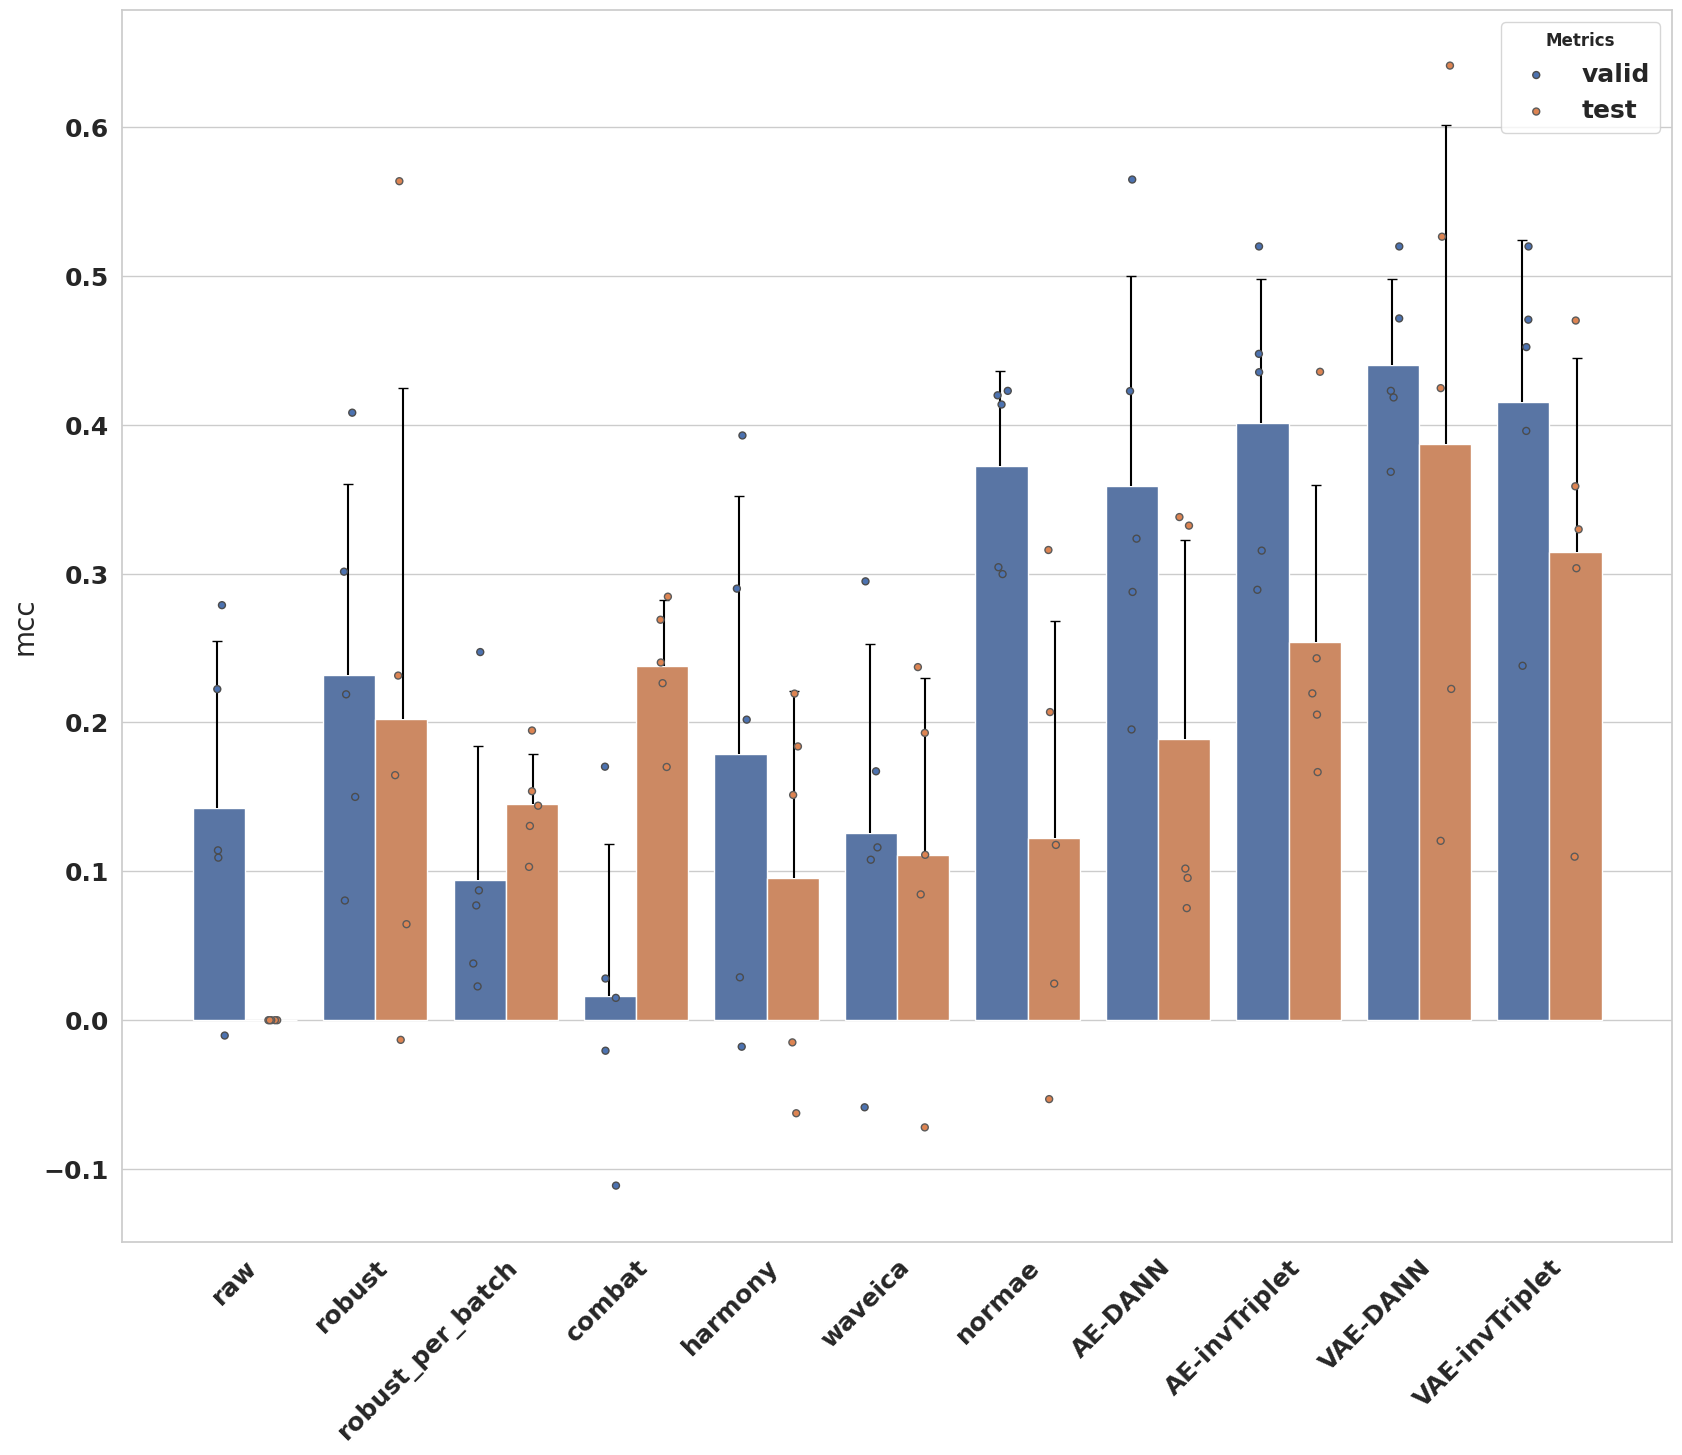

In [104]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("mcc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


In [105]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    # "sd" : pd.concat((ae_classif['valid/acc_std'], ae_classif['test/acc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_3281571/2970071099.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

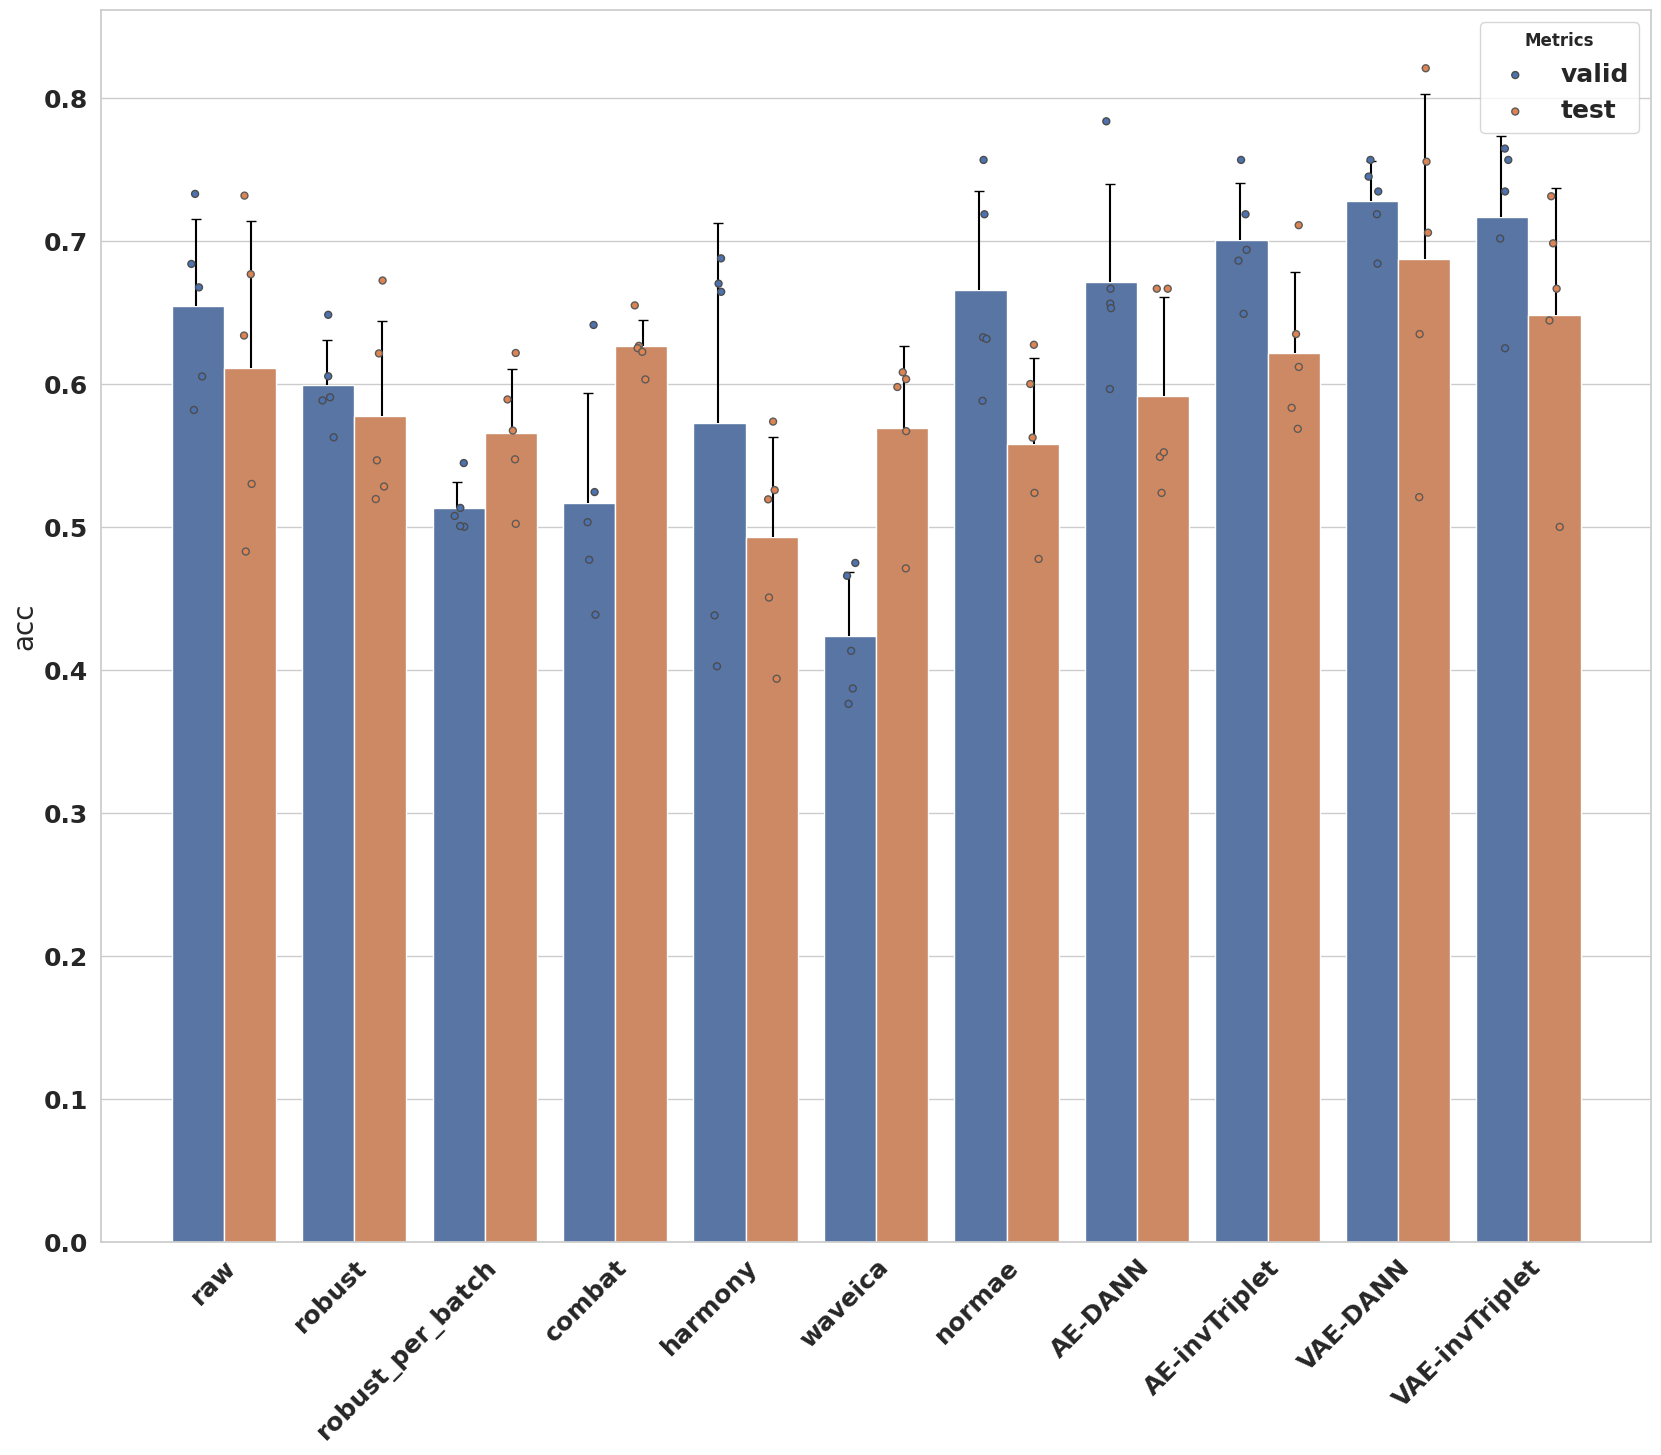

In [106]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("acc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


# Amide

In [107]:
import ast
# ae_classif = pd.read_excel('metrics_bernn.xlsx', sheet_name='amide metrics values', index_col='model name')
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='amide classif values', index_col='Unnamed: 0')

# ae_classif.drop(columns=['model name'], inplace=True)
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# ae_metrics.loc[:, 'BE'] = [(np.log(21) - x)/np.log(21) for x in ae_classif.loc[:, 'BE']]
# ae_metrics.loc[:, 'qc_aPCC'] = [[1 - xx for xx in x] for x in ae_classif.loc[:, 'qc_aPCC']]
ae_classif['model'] = ae_classif.index
ae_classif = ae_classif.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]
model_names = ae_classif['model'].tolist()


In [108]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    # "sd" : pd.concat((ae_classif['valid/mcc_std'], ae_classif['test/mcc_std'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

df = df.reset_index()
df = df.drop('index', 1)
df_valid = df_valid.reset_index()
df_valid = df_valid.drop('index', 1)
df_test = df_test.reset_index()
df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_3281571/1513299797.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('index', 1)
/tmp/ipykernel_3281571/1513299797.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_valid = df_valid.drop('index', 1)
/tmp/ipykernel_3281571/1513299797.py:28: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('index', 1)


/tmp/ipykernel_3281571/3560063738.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

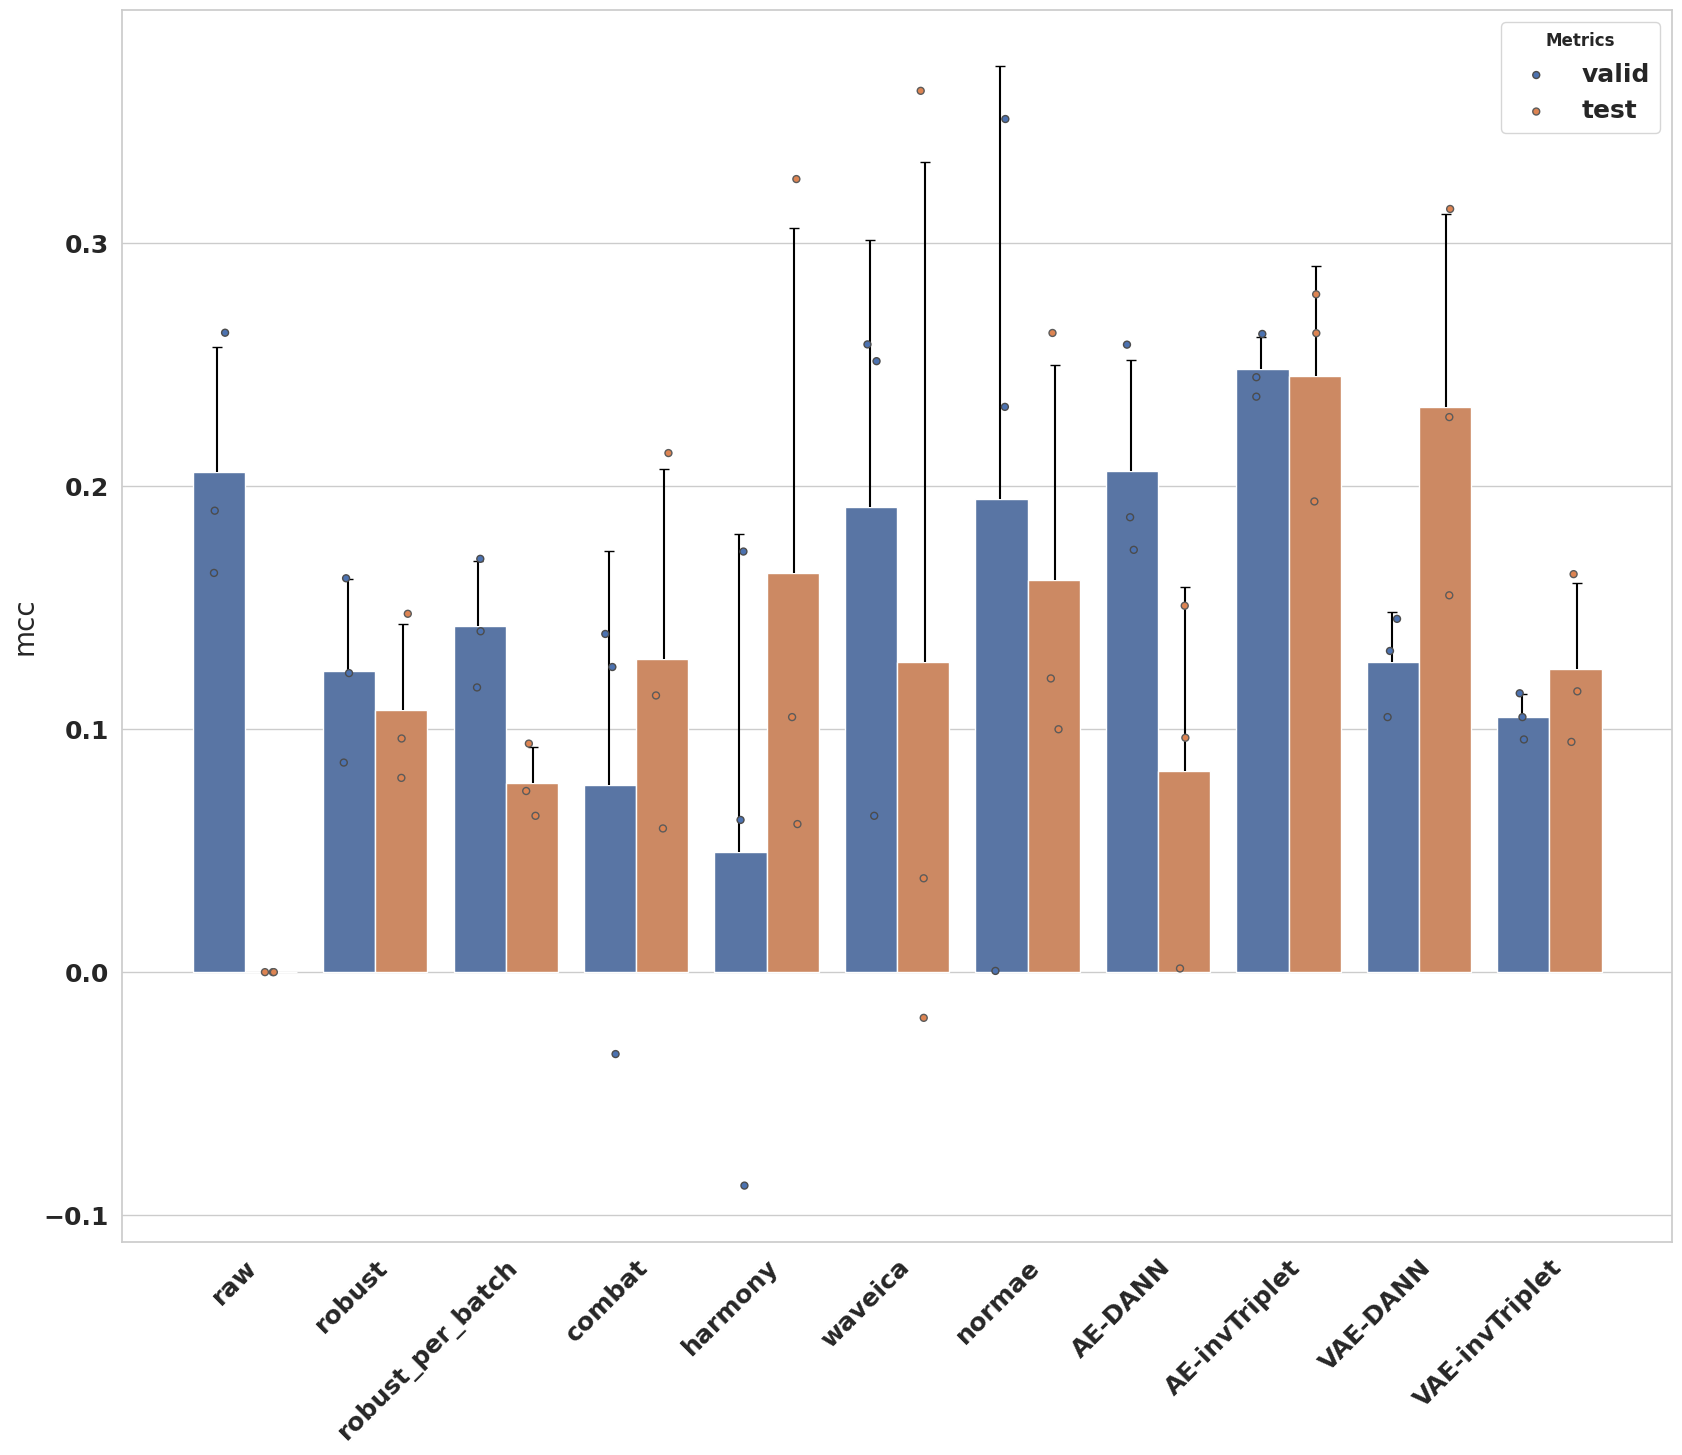

In [109]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("mcc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


In [110]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 3).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 3).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_3281571/2970071099.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

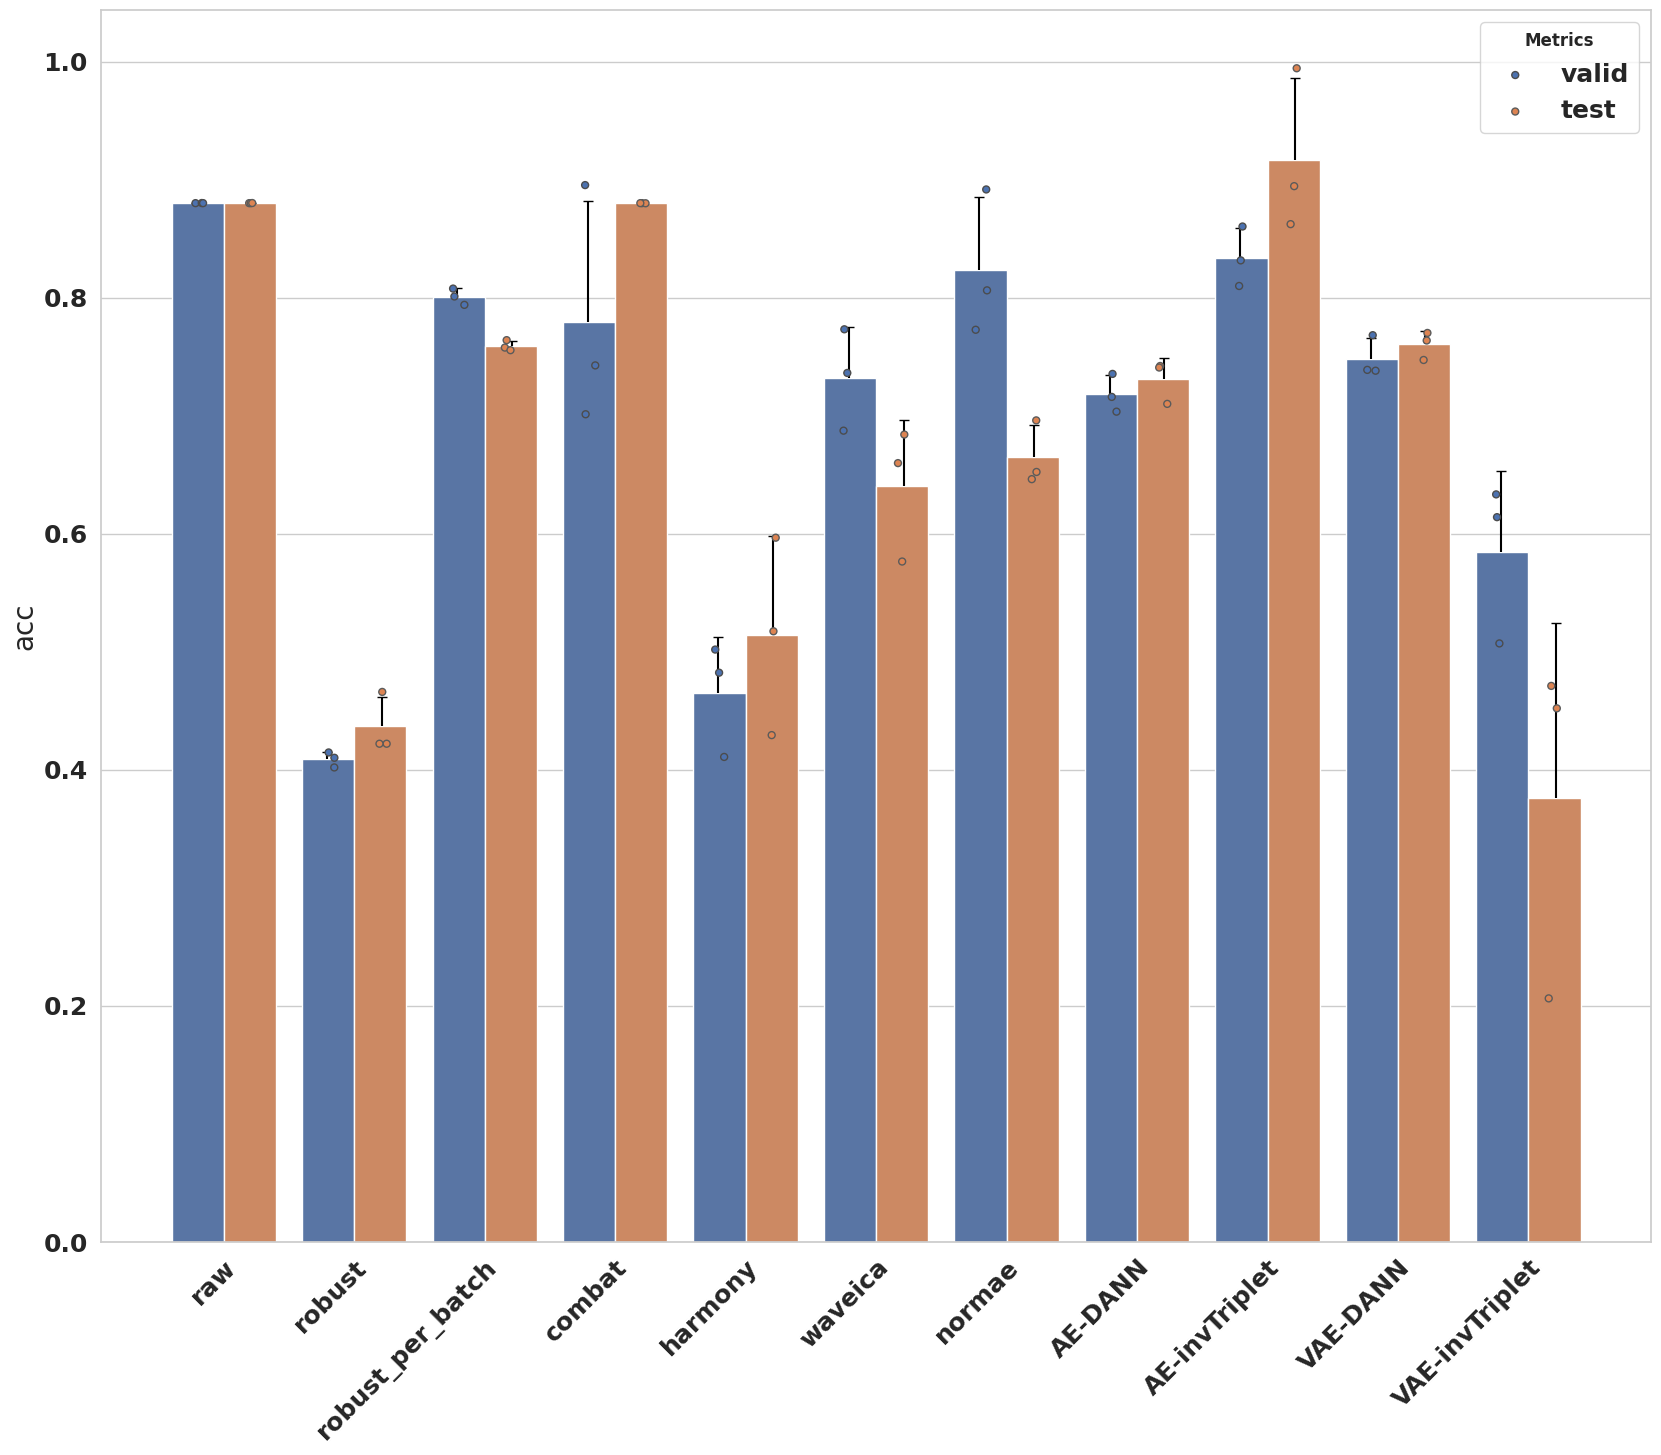

In [111]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("acc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


# Mice

In [112]:
import ast
# ae_metrics = pd.read_excel('metrics_bernn.xlsx', sheet_name='amide metrics values', index_col='model name')
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='mice classif values', index_col='Unnamed: 0')

# ae_metrics.drop(columns=['model name'], inplace=True)
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_classif['model'] = ae_classif.index
ae_classif = ae_classif.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'aedann', 'AE-invTriplet', 'vaedann', 'VAE-invTriplet']]
ae_classif.index = ['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']

model_names = ae_classif['model'].tolist()


In [113]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_3281571/1439387521.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


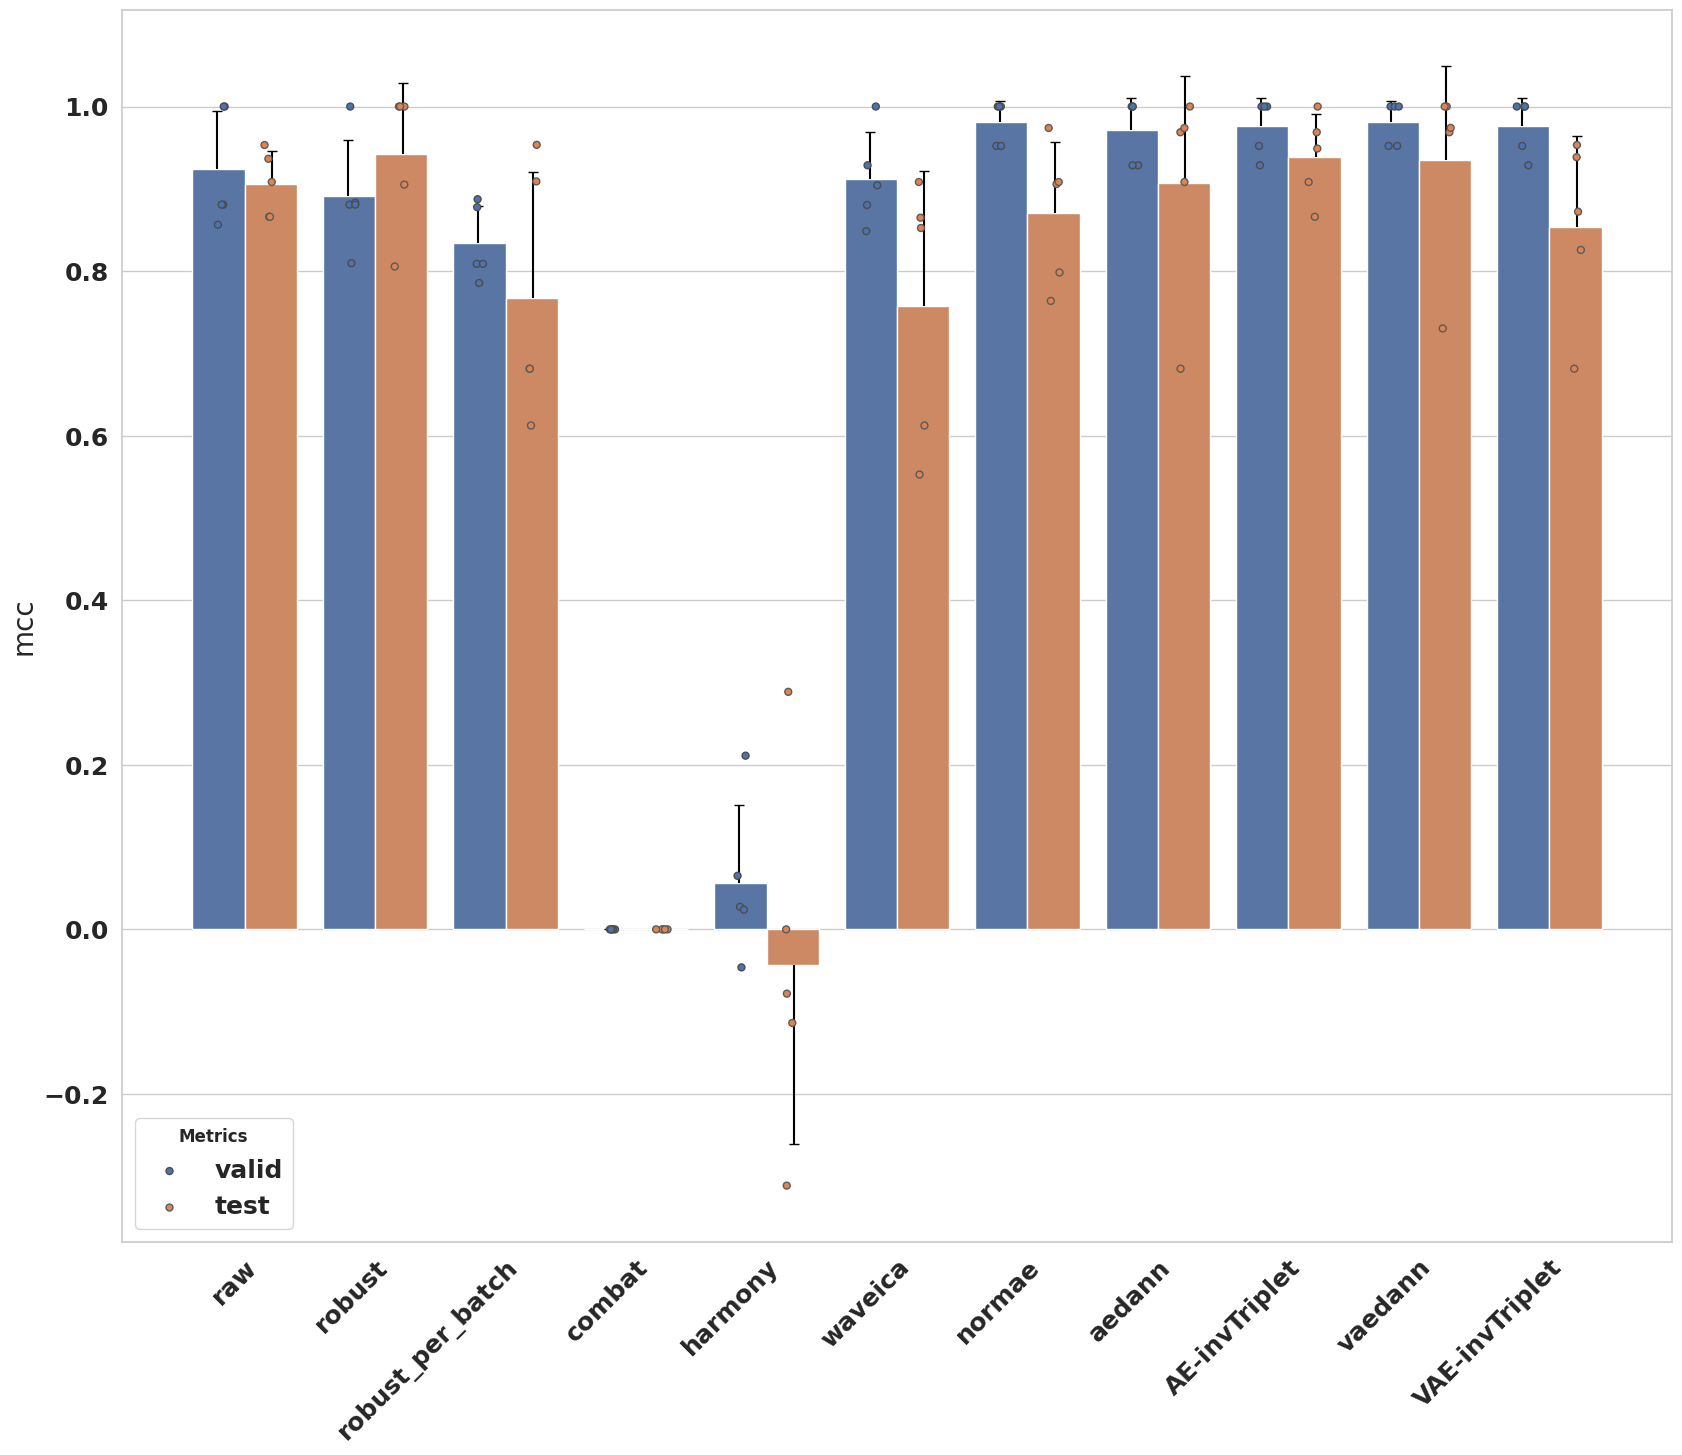

In [114]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("mcc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', labels=['valid', 'test'], fontsize=18)


In [115]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_3281571/2970071099.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

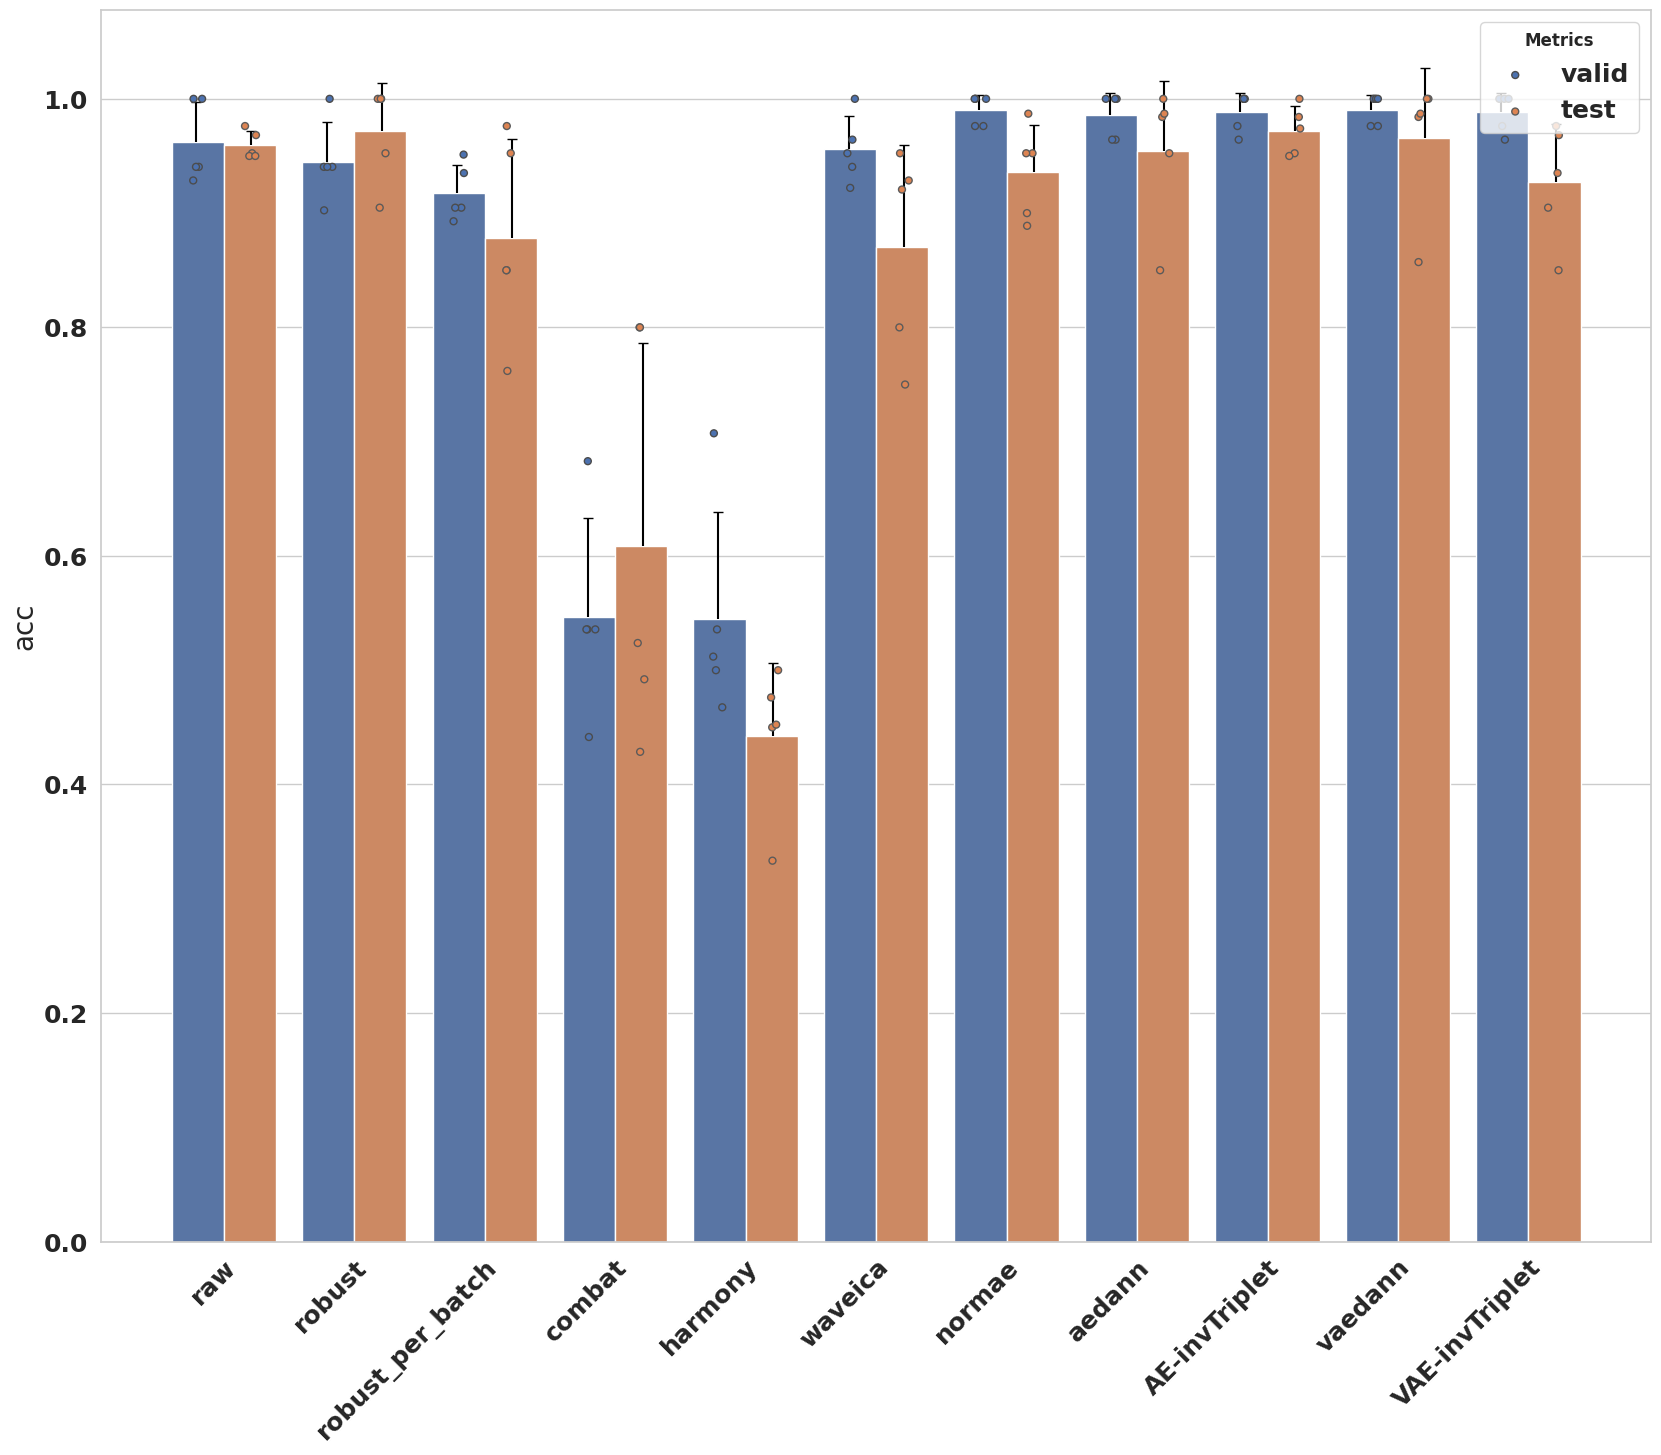

In [116]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("acc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


# Multi class

In [117]:
import ast
# ae_metrics = pd.read_excel('metrics_bernn.xlsx', sheet_name='amide metrics values', index_col='model name')
ae_classif = pd.read_excel('metrics_bernn(3).xlsx', sheet_name='multi classif values', index_col='model')

# ae_metrics.drop(columns=['model name'], inplace=True)
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_classif['model'] = ae_classif.index
ae_classif = ae_classif.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'aedann', 'AE-invTriplet', 'vaedann', 'VAE-invTriplet']]
ae_classif.index = ['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']

model_names = ae_classif['model'].tolist()


In [118]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_3281571/874962522.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')


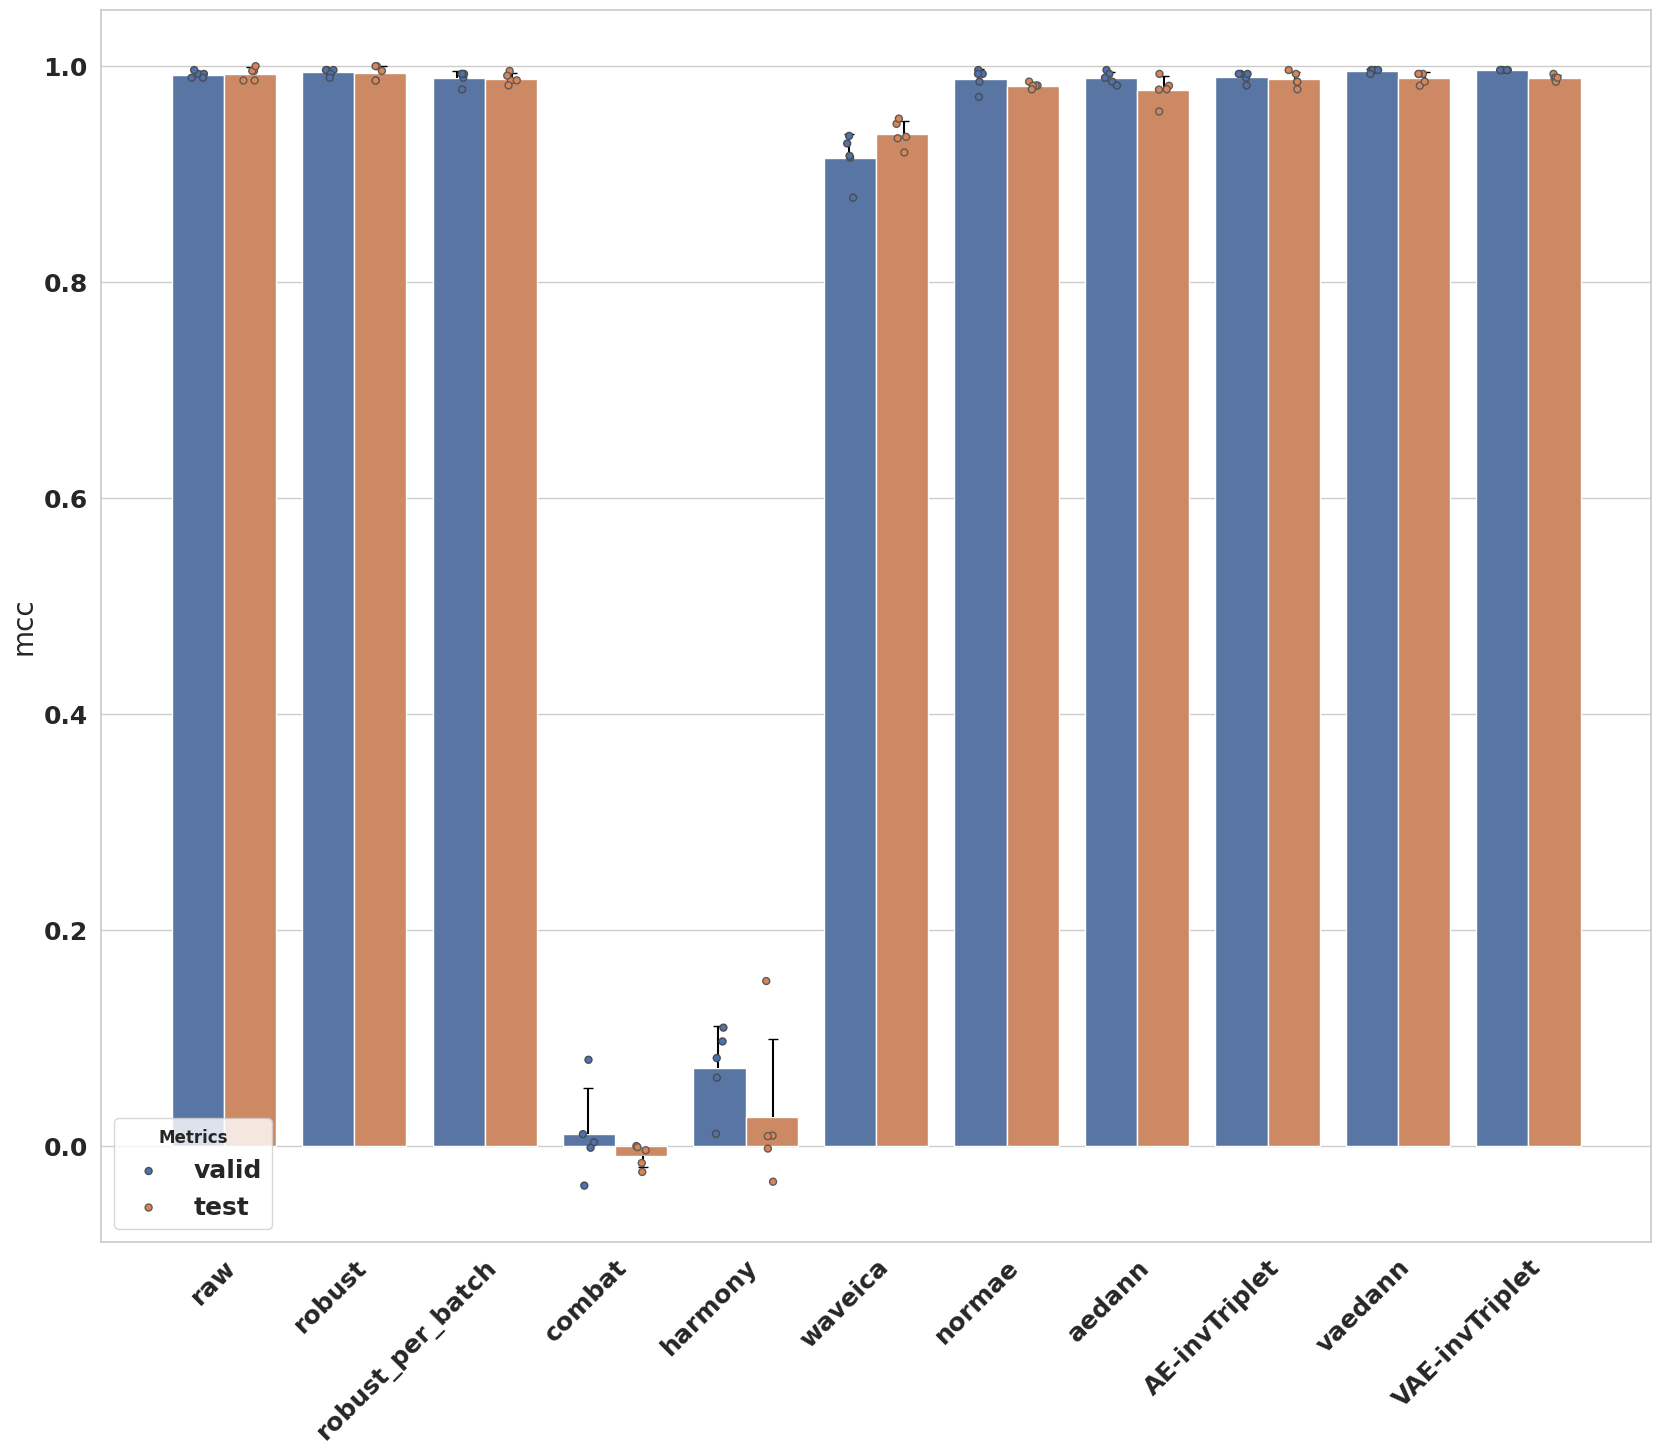

In [119]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("mcc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', labels=['valid', 'test'], fontsize=18)


In [120]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_3281571/2970071099.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

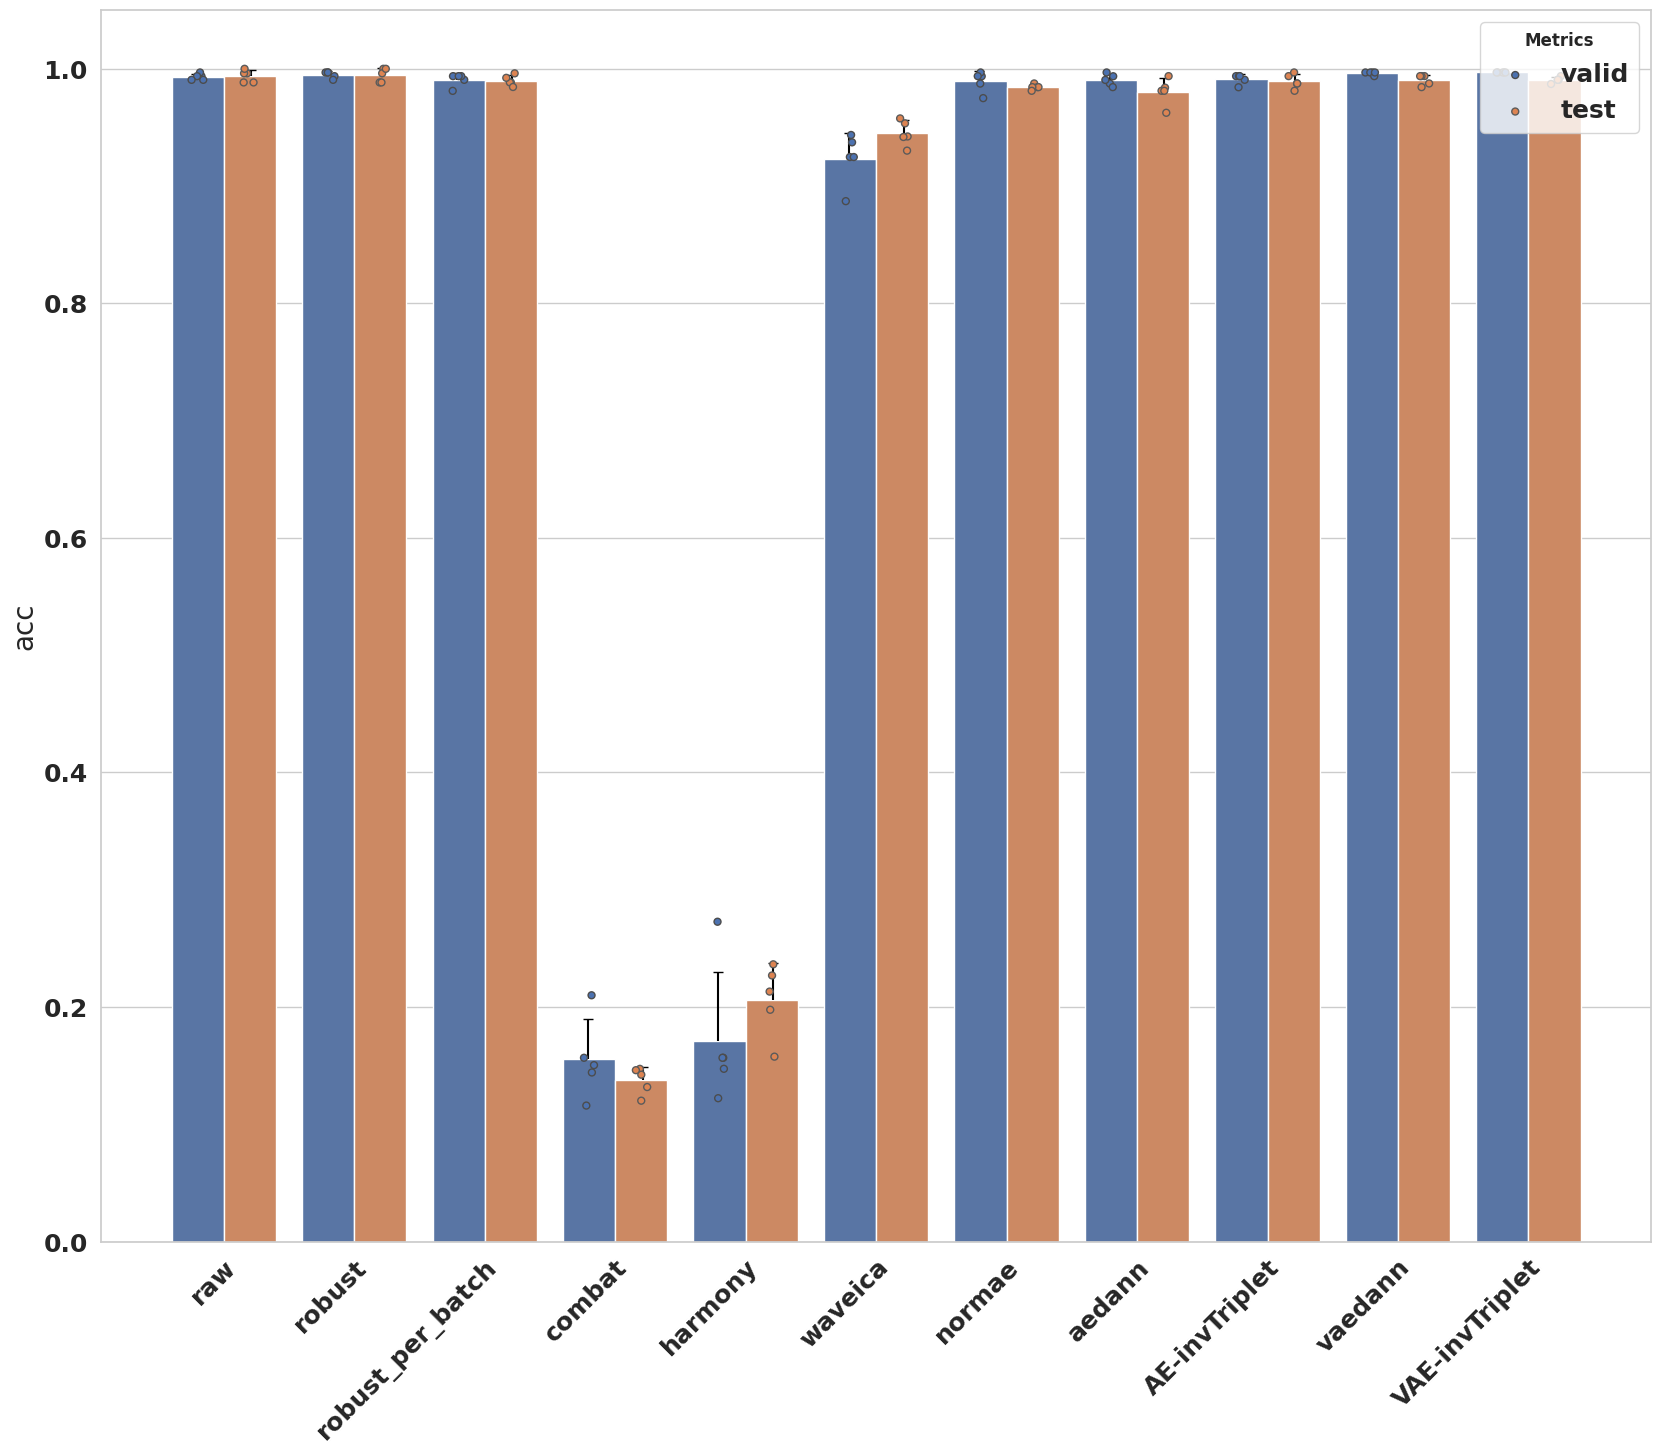

In [121]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("acc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


/tmp/ipykernel_3281571/2970071099.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

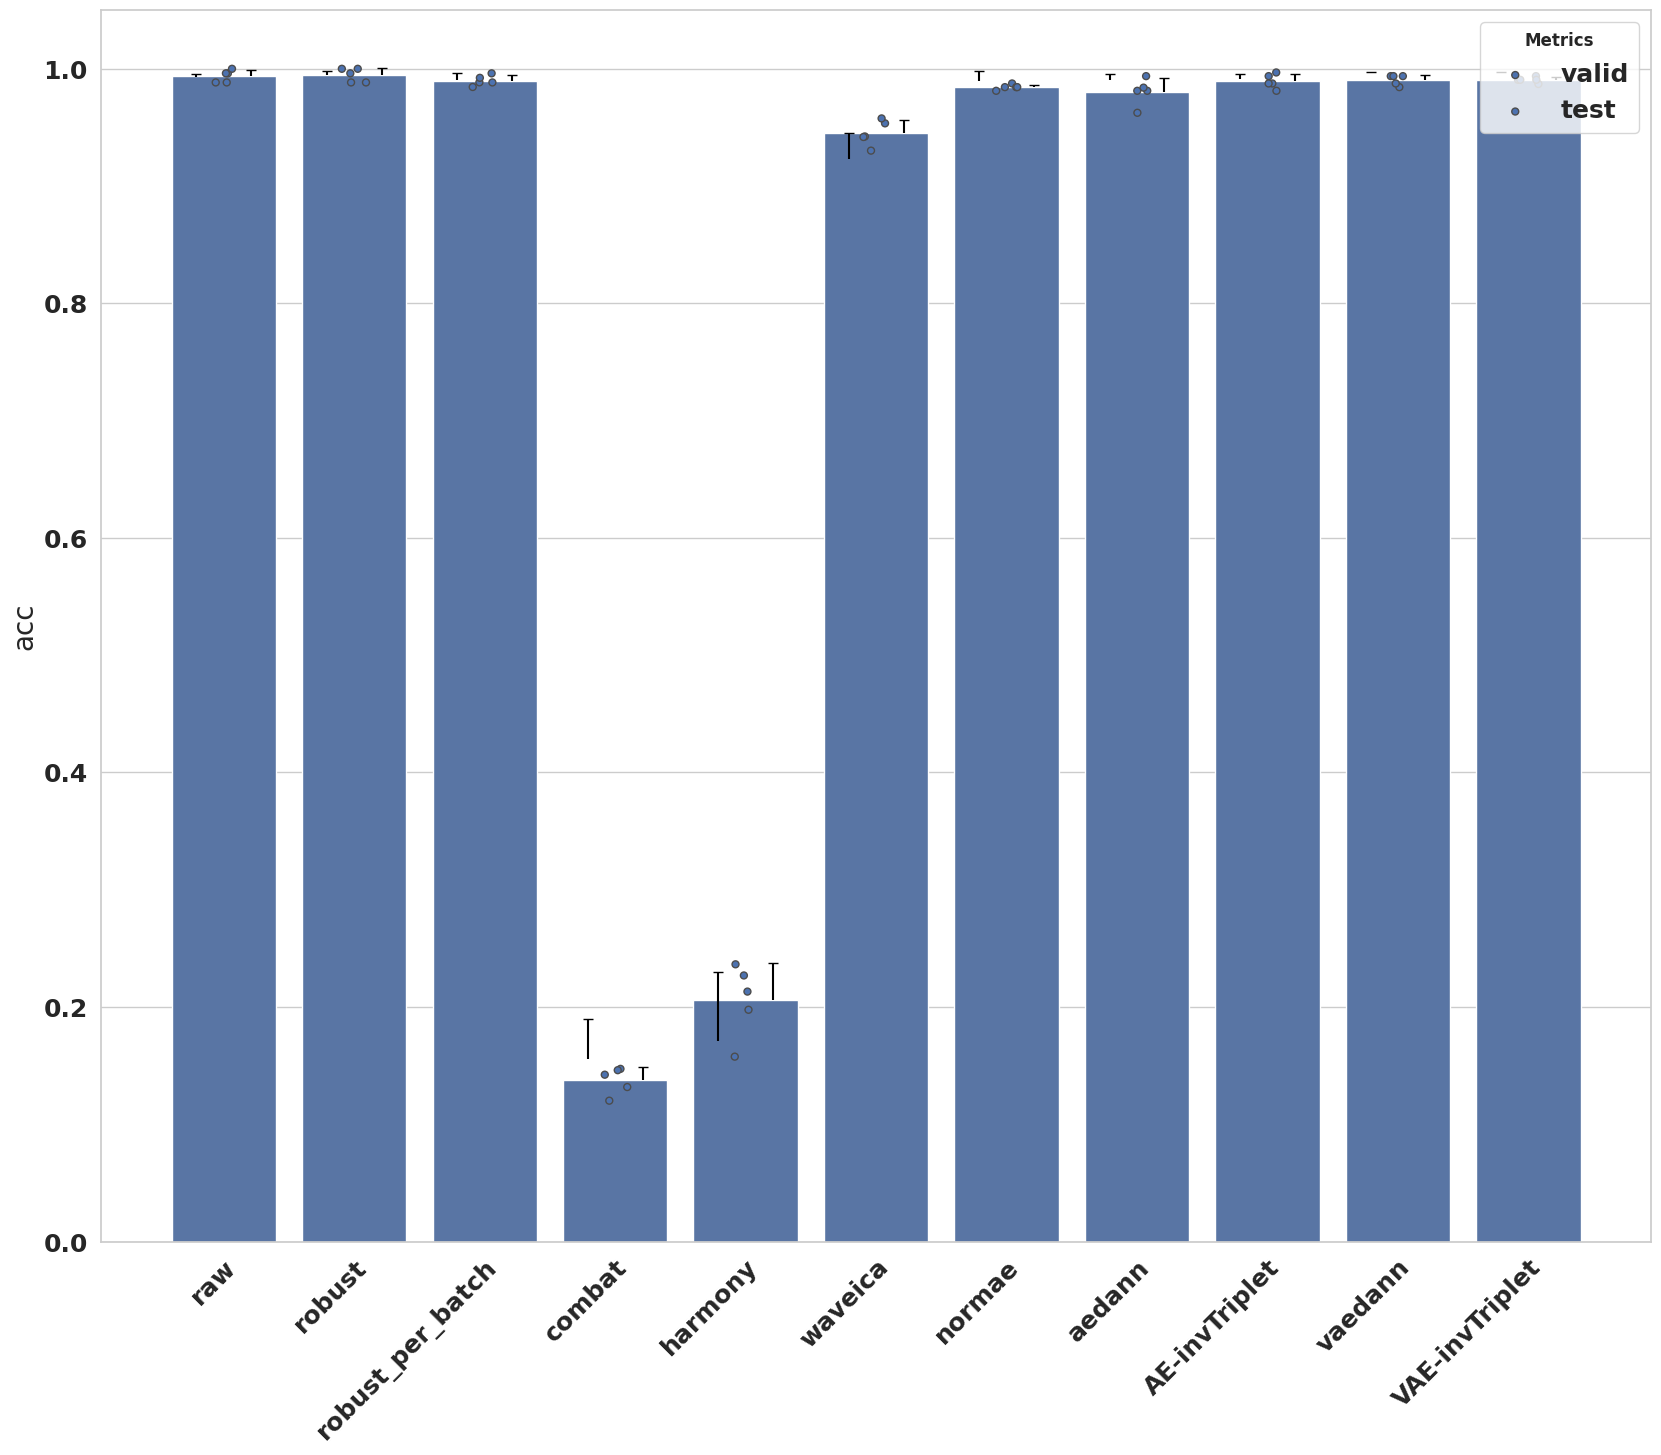

In [122]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("acc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


In [123]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_3281571/874962522.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')


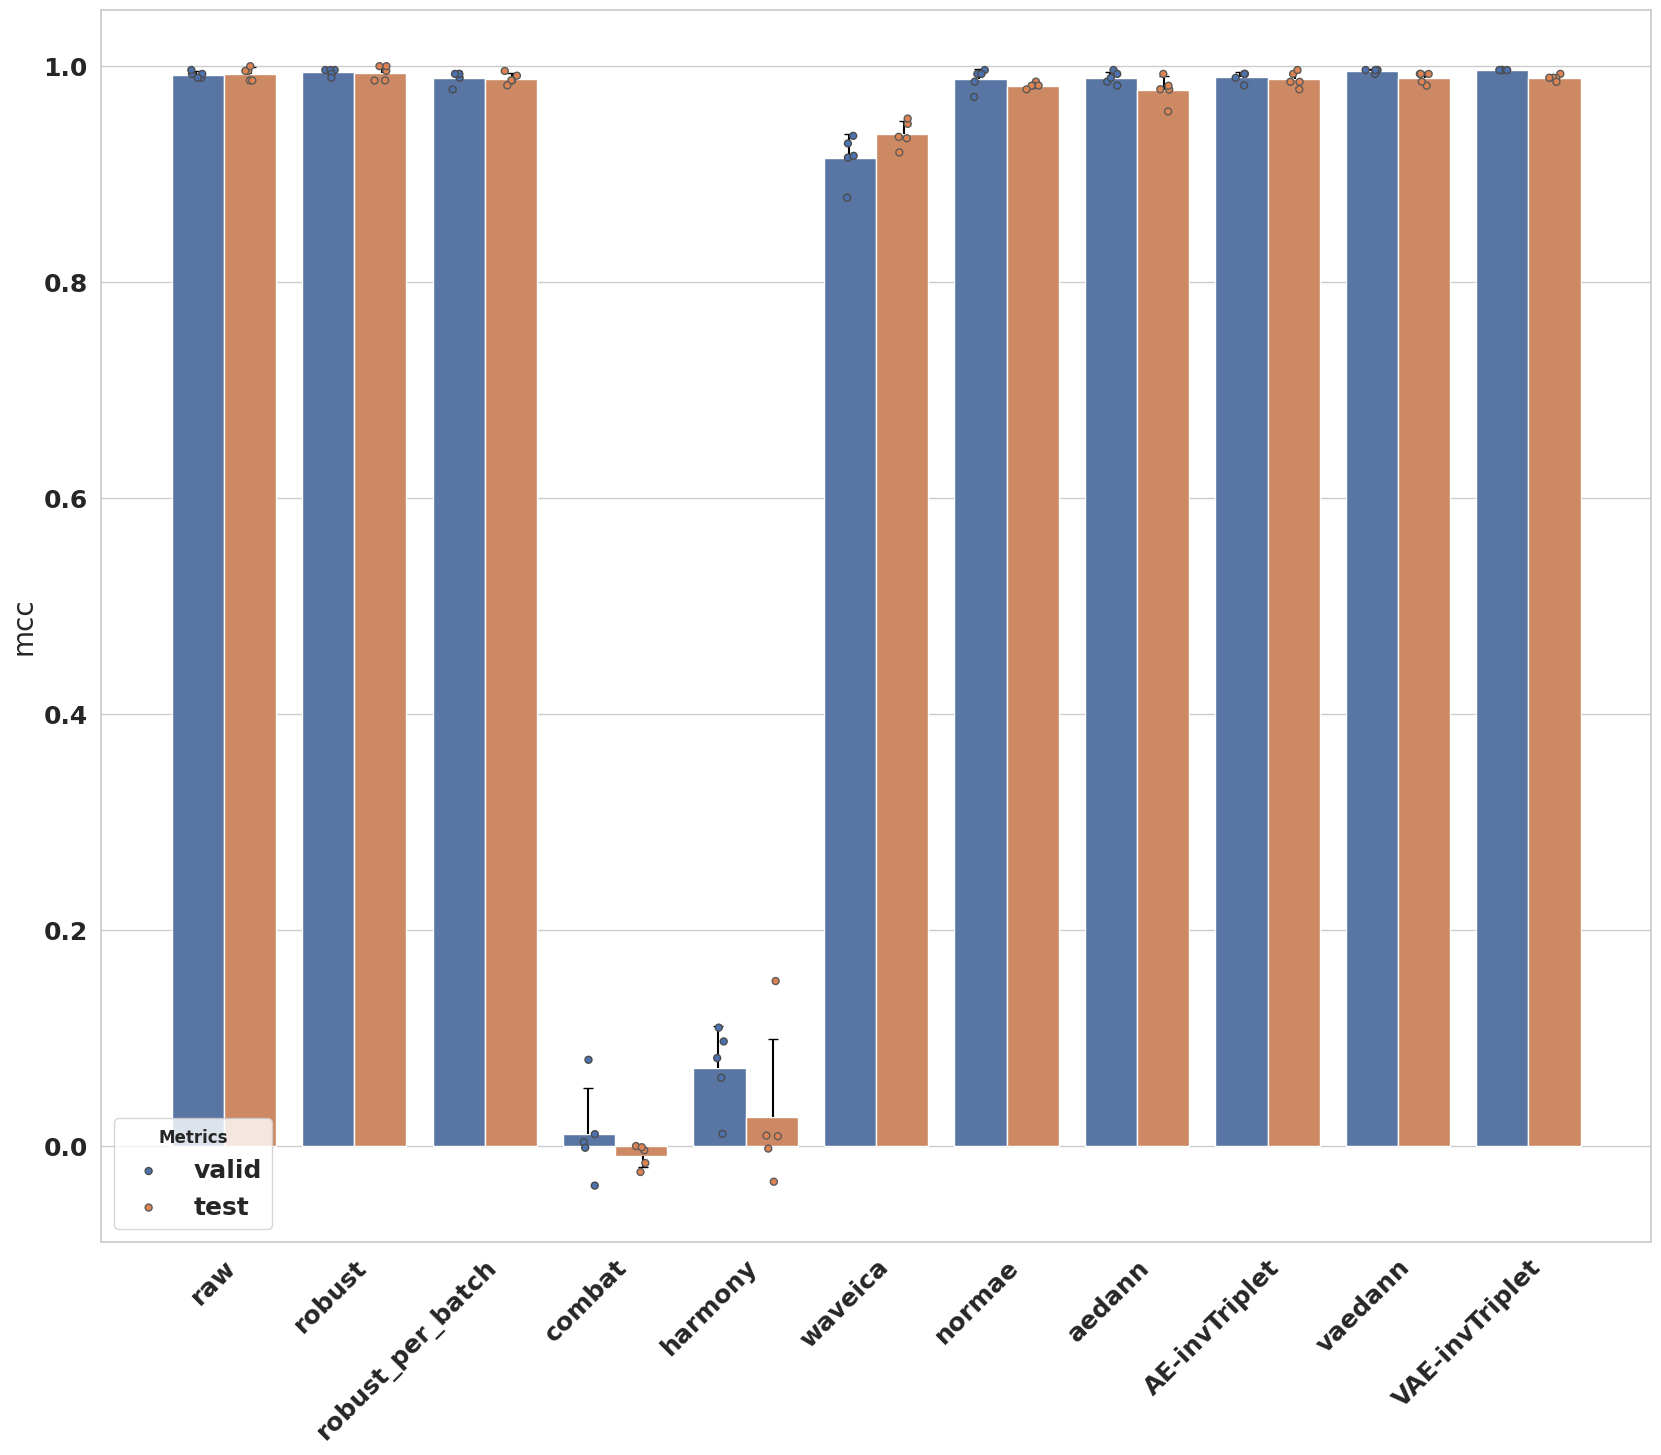

In [124]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("mcc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', labels=['valid', 'test'], fontsize=18)


In [125]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_3281571/2970071099.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

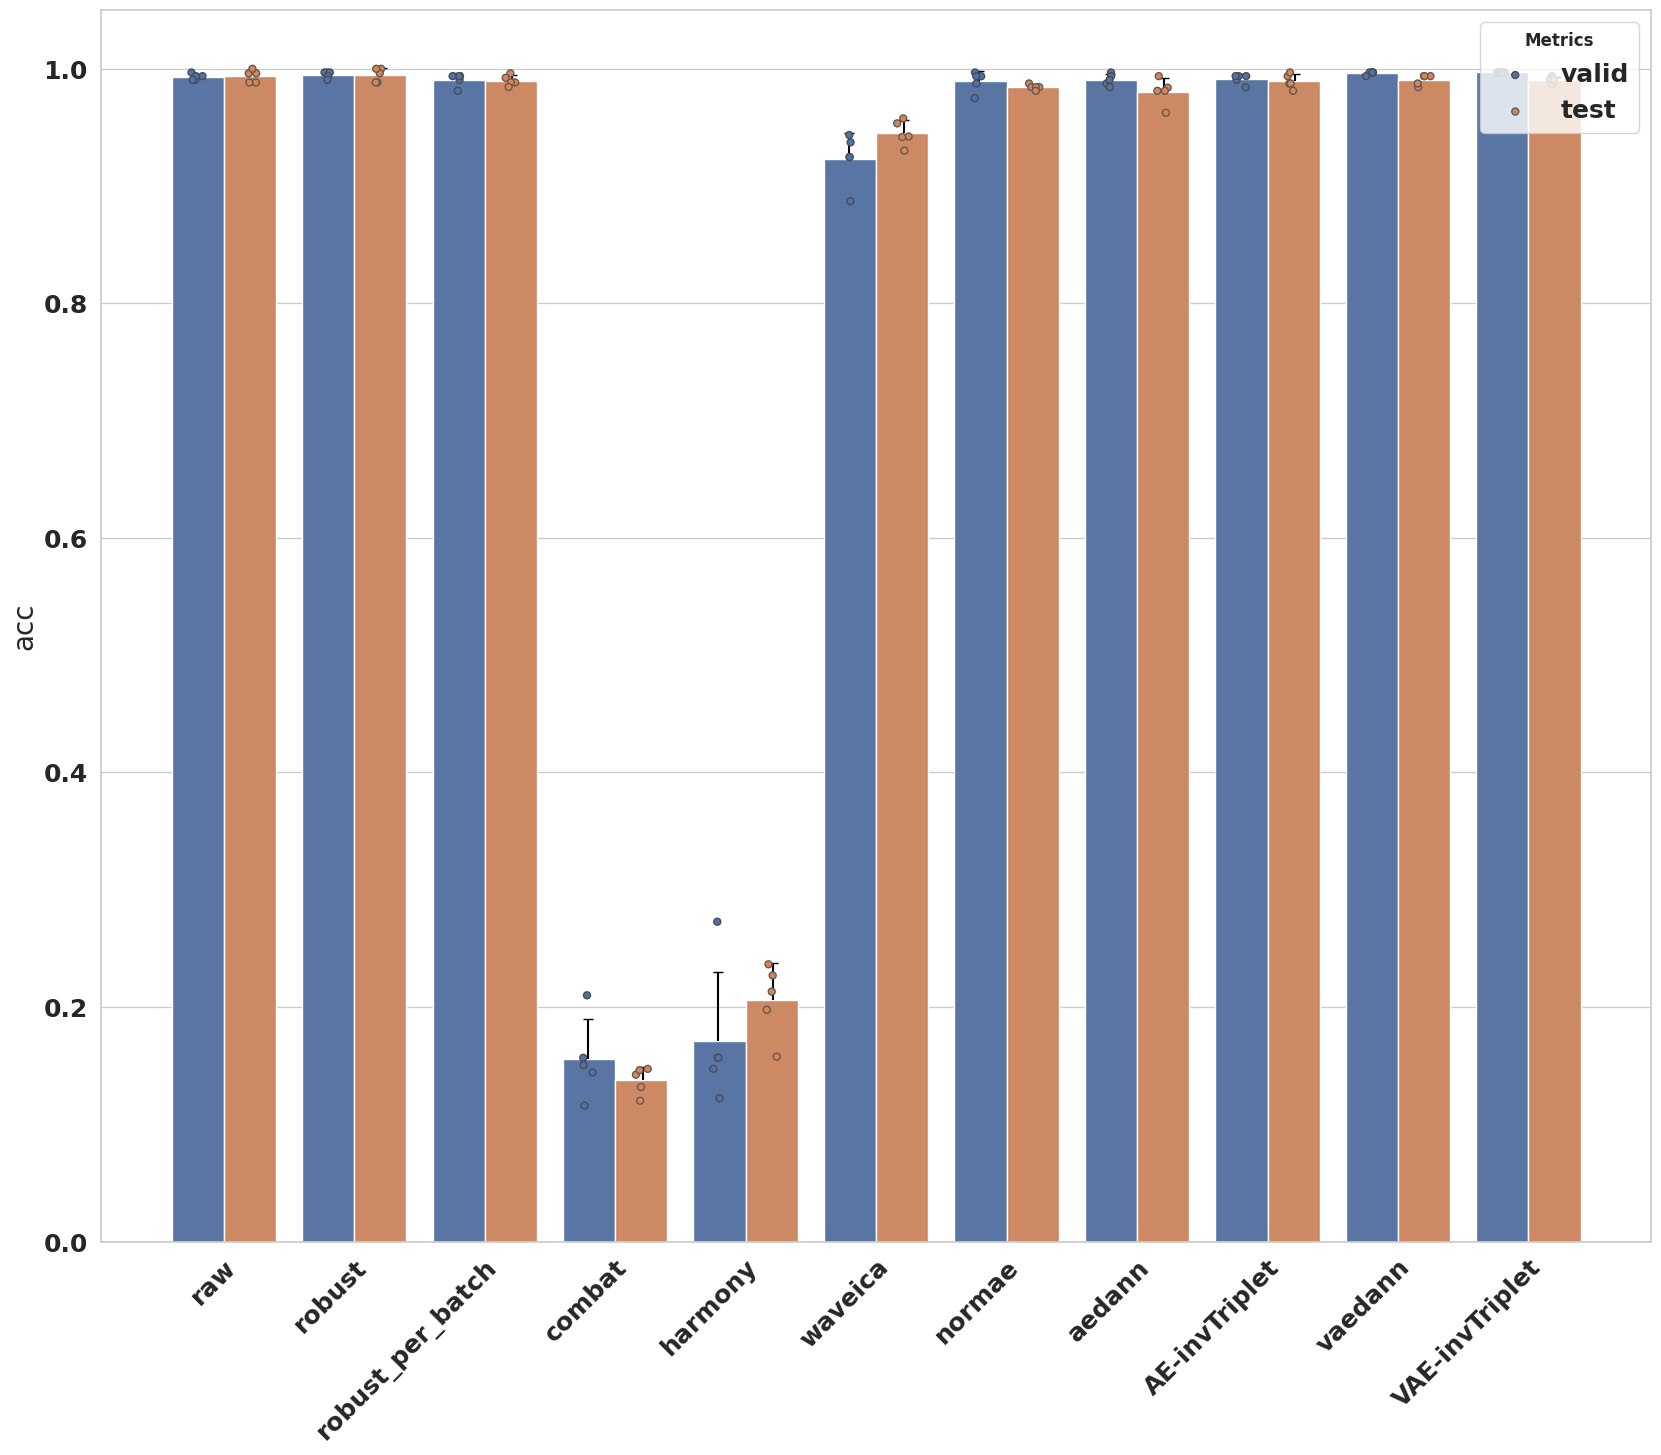

In [126]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("acc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


/tmp/ipykernel_3281571/2970071099.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

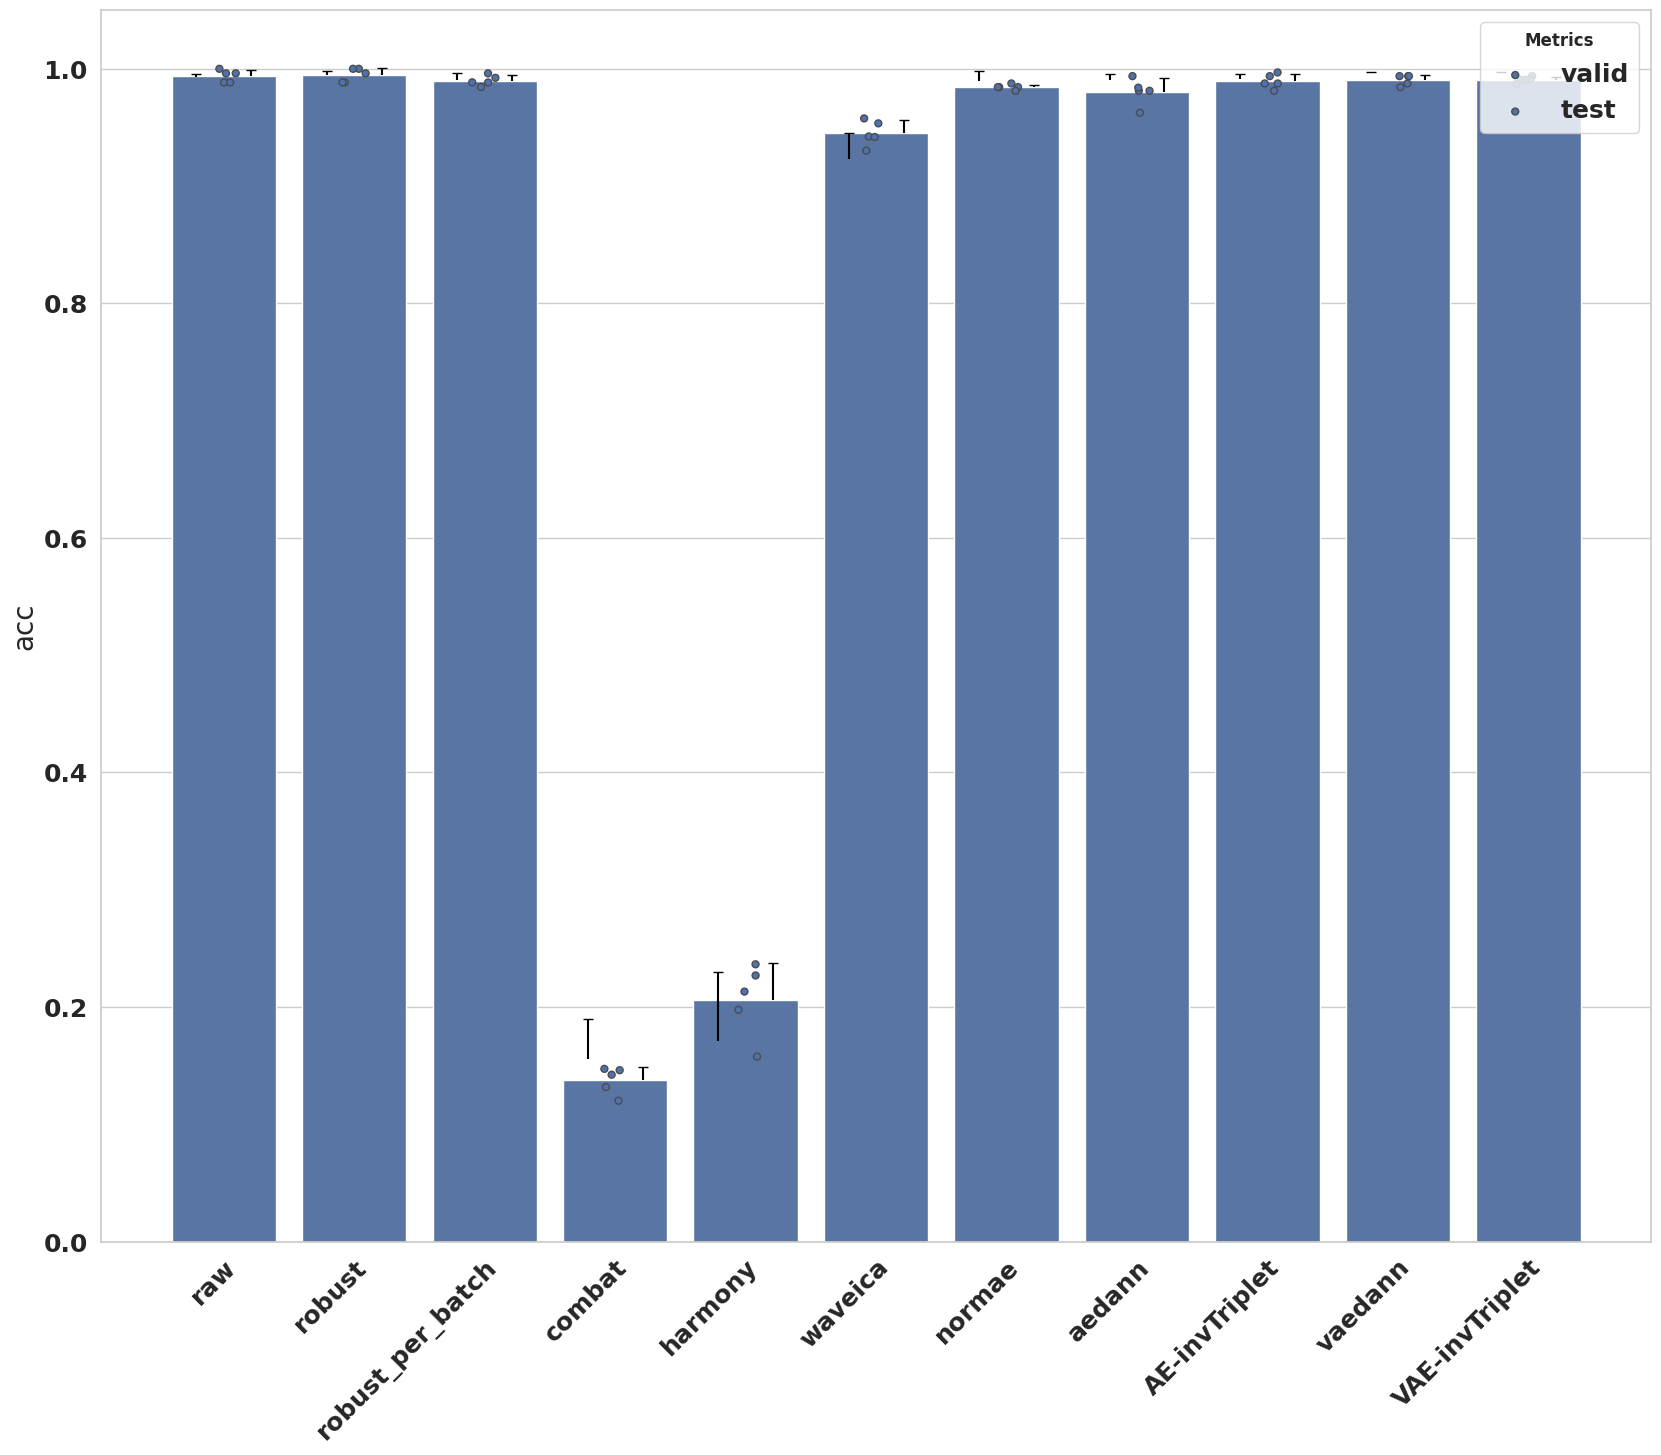

In [127]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("acc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)


# Benchmark

In [128]:
import ast
# ae_metrics = pd.read_excel('metrics_bernn.xlsx', sheet_name='amide metrics values', index_col='model name')
ae_classif = pd.read_excel('metrics_bernn_5models.xlsx', sheet_name='benchmark classif values', index_col='model')

# ae_metrics.drop(columns=['model name'], inplace=True)
ae_classif.iloc[:] = ae_classif.applymap(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
ae_classif['model'] = ae_classif.index
ae_classif = ae_classif.loc[['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']]
ae_classif.index = ['raw', 'robust', 'robust_per_batch', 'combat', 'harmony', 'waveica', 'normae', 'AE-DANN', 'AE-invTriplet', 'VAE-DANN', 'VAE-invTriplet']

model_names = ae_classif['model'].tolist()


In [129]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "mcc": pd.concat((ae_classif['valid/mcc'], ae_classif['test/mcc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['valid/mcc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "mcc": ae_classif['test/mcc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['mcc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['mcc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['mcc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['mcc', 'models', 'group'])

df.loc[:, 'mcc'] = [float(x) for x in df.loc[:, 'mcc']]
df_valid.loc[:, 'mcc'] = [float(x) for x in df_valid.loc[:, 'mcc']]
df_test.loc[:, 'mcc'] = [float(x) for x in df_test.loc[:, 'mcc']]


/tmp/ipykernel_3281571/2052707470.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')


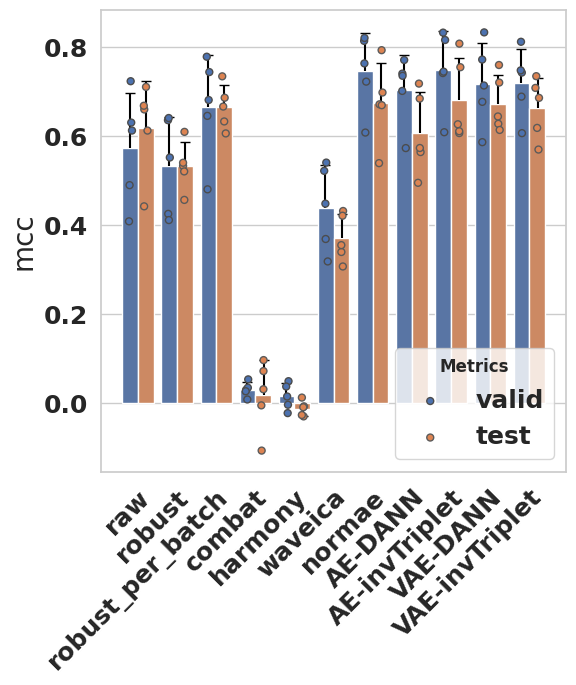

In [130]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

# sns.set(rc={'figure.figsize':(20, 16)})
sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='mcc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='mcc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['mcc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['mcc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['mcc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("mcc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', labels=['valid', 'test'], fontsize=18)


In [131]:
# channel = ["Red", "Green", "Blue", "Red", "Green", "Blue", "Red", "Green", "Blue"]
df = pd.DataFrame({
    # "channel": channel,
    "acc": pd.concat((ae_classif['valid/acc'], ae_classif['test/acc'])),
    "models": pd.concat((ae_classif['model'], ae_classif['model'])),
    "group": ['valid' for _ in range(len(ae_classif['model']))] + ['test' for _ in range(len(ae_classif['model']))]
})
df_valid = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['valid/acc'],
    "models": ae_classif['model'],
    "group": ['valid' for _ in range(len(ae_classif['model']))]
})
df_test = pd.DataFrame({
    # "channel": channel,
    "acc": ae_classif['test/acc'],
    "models": ae_classif['model'],
    "group": ['test' for _ in range(len(ae_classif['model']))]
})
lolims = [True for _ in range(len(df_valid['group']))]

# df = df.reset_index()
# df = df.drop('index', 1)
# df_valid = df_valid.reset_index()
# df_valid = df_valid.drop('index', 1)
# df_test = df_test.reset_index()
# df_test = df_test.drop('index', 1)
# df = df.drop('level_0', 1)

df = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df.shape[0])
]), columns=['acc', 'models', 'group'])

df_valid = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_valid.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_valid.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_valid.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_valid.shape[0])
]), columns=['acc', 'models', 'group'])

df_test = pd.DataFrame(np.concatenate([
    np.concatenate((
        np.array(df_test.iloc[i]['acc']).reshape([-1, 1]), 
        np.array([df_test.iloc[i]['models']] * 5).reshape([-1, 1]),
        np.array([df_test.iloc[i]['group']] * 5).reshape([-1, 1]),
    ), 1)
    for i in range(df_test.shape[0])
]), columns=['acc', 'models', 'group'])

df.loc[:, 'acc'] = [float(x) for x in df.loc[:, 'acc']]
df_valid.loc[:, 'acc'] = [float(x) for x in df_valid.loc[:, 'acc']]
df_test.loc[:, 'acc'] = [float(x) for x in df_test.loc[:, 'acc']]


/tmp/ipykernel_3281571/2970071099.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

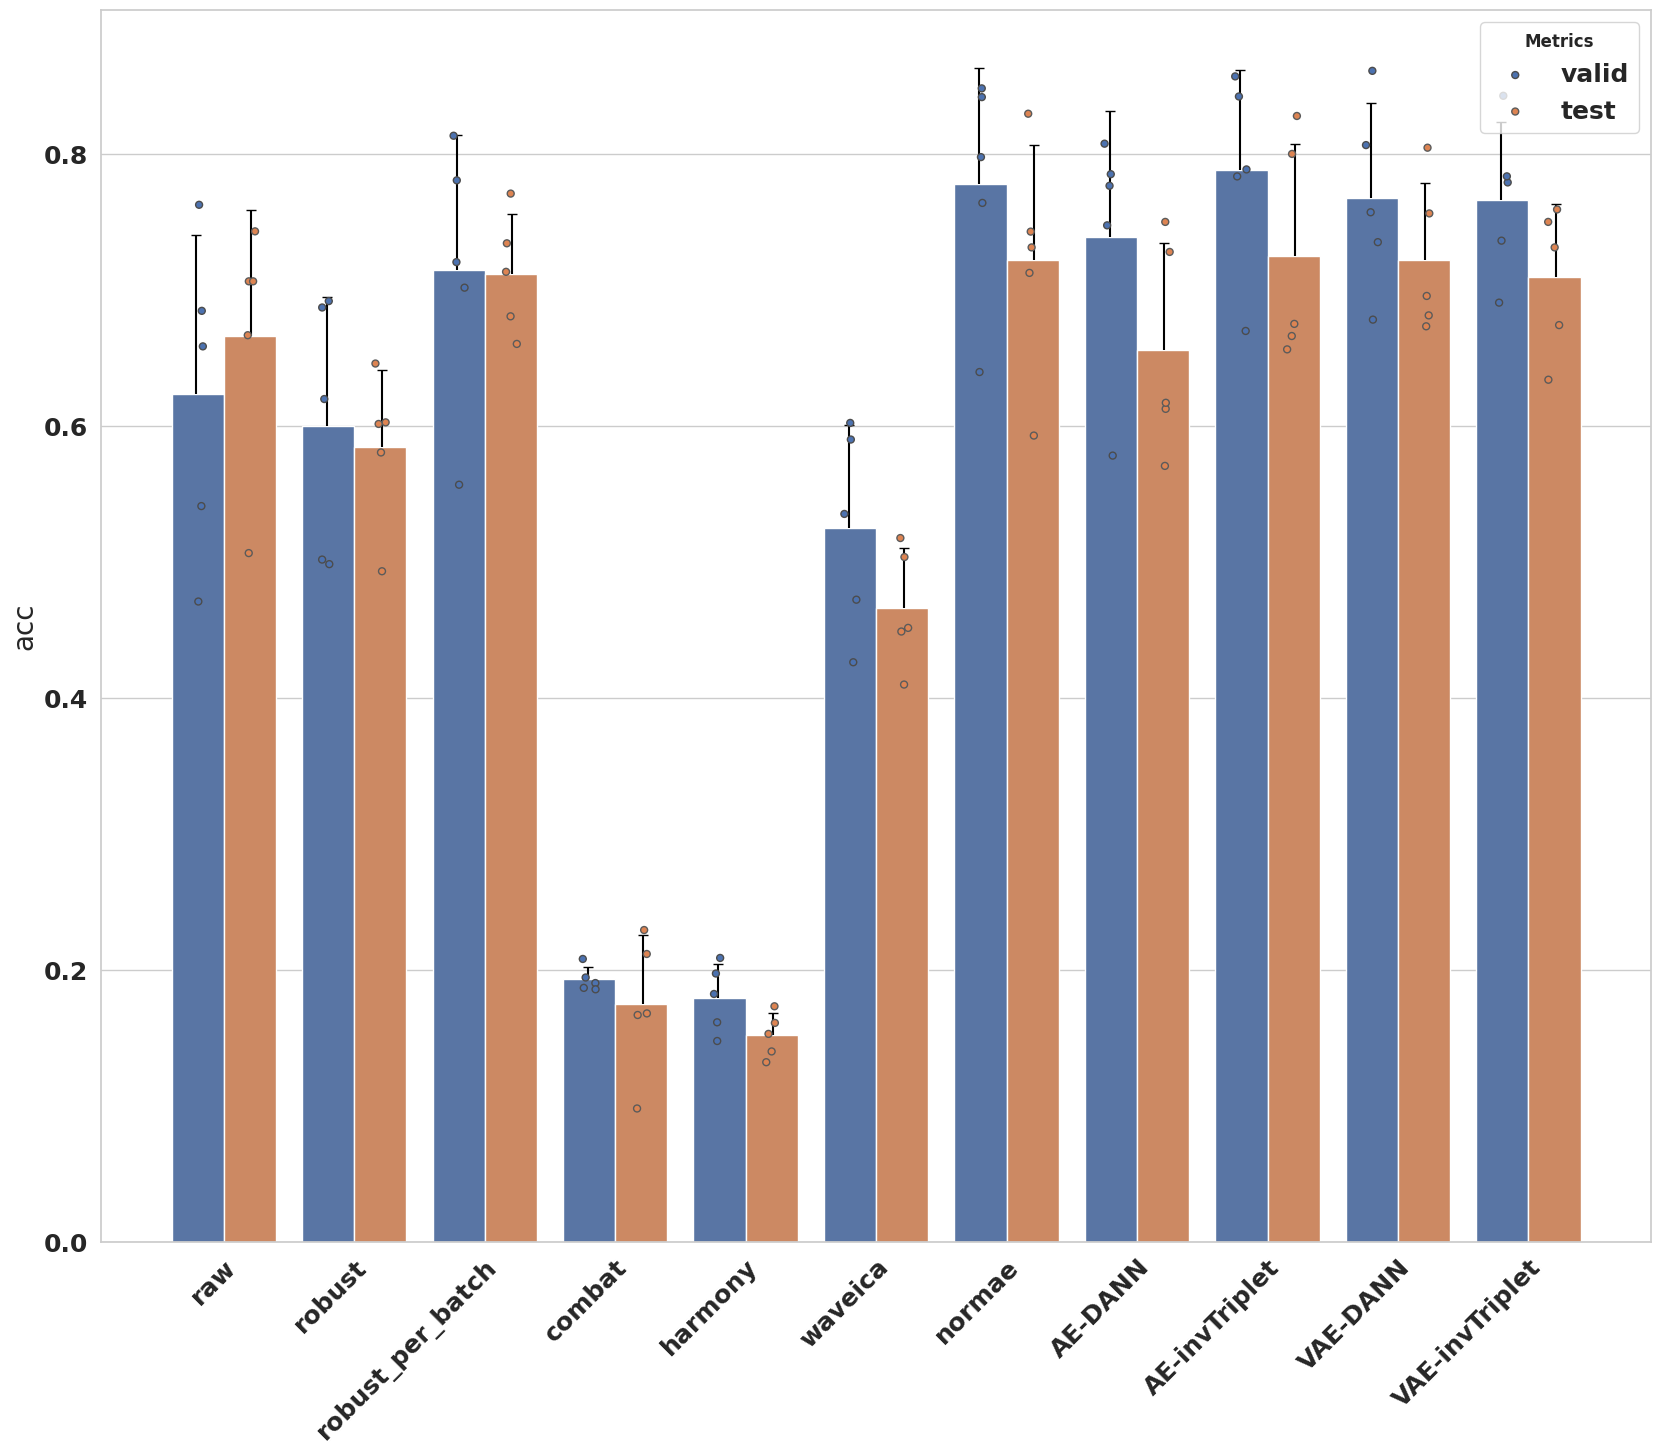

In [132]:
N = len(df['models'].unique())
# width = 0.2
ind = np.arange(N)
width = 0.155

sns.set(rc={'figure.figsize':(20, 16)})
sns.set_style(style='whitegrid') 
g = sns.barplot(x="models", y='acc', data=df, ci=None, hue='group')
# g.legend_.remove()
g = sns.stripplot(
    x="models", 
    y='acc', 
    data=df, 
    hue='group',
    dodge=True,
    linewidth=1
    
)
g.legend_.remove()
g.set_xticklabels(rotation=90, labels=model_names)

for df, offset in zip([df_valid, df_test], [-0.21, 0.21]):
    
    lolims = [True if v > 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]
    uplims = [True if v <= 0 else False for v in df.groupby(['models'], sort=False)['acc'].mean()]

    plotline, caplines, barlinecols = g.errorbar(x = ind+offset, y = df.groupby(['models'], sort=False)['acc'].mean(), lolims=lolims, uplims=uplims,
                yerr=df.groupby(['models'], sort=False)['acc'].std(), fmt='none', c= 'black', capsize = 0)

    # [arrow] -> [-]
    for capline in caplines:
        capline.set_marker('_')
        capline.set_markersize(7)
# plt.setp(g.get_legend().get_texts()[-4:], fontsize='22') # for legend text

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 64}
matplotlib.rc('font', **font)
g.set_xlabel("")
g.set_ylabel("acc",fontsize=20)
plt.xticks(rotation = 45, ha='right', rotation_mode='anchor', fontsize=18)
plt.yticks(fontsize=18)

plt.legend(title='Metrics', loc='upper right', labels=['valid', 'test'], fontsize=18)
